####  <span style="color:#5D8BF4"> Irena Vent </span>

# <span style="color:#051367"> Práctica Estadística</span>

In [1]:
library(ggplot2)
library(dplyr)
options(repr.plot.height=7,repr.plot.width=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<span style="color:#051367">Cargar los datos en un dataframe llamado: airbnb</span>

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

<span style="color:#051367">Mostrar las primeras 6 filas del dataframe</span>

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


<span style="color:#051367">Renombrar las columnas de la siguiente forma:</span>

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

In [4]:
names(airbnb)<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos","NumDormitorios",
                 "NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)
head(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


<span style="color:#051367">Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.</span>

<span style="color:#051367">Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados</span>


In [5]:
is.numeric(airbnb$PiesCuadrados)

[1] TRUE

In [6]:
airbnb$PiesCuadrados

[1]   NA   NA   NA   NA  538   NA   NA   NA  700   NA   40   NA   NA   NA
   [15]  646   NA   NA   NA   NA   NA   NA   NA   NA   NA  753   NA   NA   NA
   [29]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [43]   NA   NA   NA  269    0   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [57]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [71]   NA   NA   NA   NA    0   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [85]   NA   NA   NA   NA   NA   NA   NA   NA  409   NA   NA   NA   NA   NA
   [99]    0   NA   NA   NA   NA   NA   NA   NA   NA   NA   25   NA   NA   NA
  [113]   NA   NA   NA   NA    0   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [127]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [141]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [155]   NA   NA   NA   NA   NA  969   NA   NA   NA   NA   NA   NA   NA   NA
  [169]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [183]   NA   NA  280   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [197]   NA   NA   NA  323   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [211]   NA   NA   NA   NA   NA   NA   NA  700   NA   NA   NA   NA   NA   NA
  [225]   NA   NA   NA   NA   NA   NA   NA   NA   NA    0   NA   NA   NA   NA
  [239]    0   NA   NA   NA   NA   NA    0   NA   NA   NA   NA   NA   NA   NA
  [253]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  538   NA   NA
  [267]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [281]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [295]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [309]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA    0
  [323]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [337]   NA   NA   NA   NA   NA    0   NA   NA   NA   NA   NA   NA   NA   NA
  [351]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [365]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [379]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [393]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [407]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   16   NA
  [421]   NA   NA   NA   NA    0   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [435]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [449]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [463] 1076   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [477]   NA   NA   NA   NA  646   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [491]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [505]   NA   NA   NA   NA   NA    0   NA    0   NA   NA   NA   NA   NA   NA
  [519]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [533]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [547]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  700
  [561]   NA   NA   NA   NA   NA   NA 1711   NA   NA    0   NA   NA   NA 2153
  [575]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [589]   NA   NA   NA   NA    9   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [603]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [617]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [631]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [645]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [659]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [673]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  538   NA   NA
  [687]   NA   NA   NA 1453   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [701]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [715]  388   NA   NA   N

In [7]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados*0.092903

In [8]:
airbnb$MetrosCuadrados

[1]         NA         NA         NA         NA  49.981814         NA
    [7]         NA         NA  65.032100         NA   3.716120         NA
   [13]         NA         NA  60.015338         NA         NA         NA
   [19]         NA         NA         NA         NA         NA         NA
   [25]  69.955959         NA         NA         NA         NA         NA
   [31]         NA         NA         NA         NA         NA         NA
   [37]         NA         NA         NA         NA         NA         NA
   [43]         NA         NA         NA  24.990907   0.000000         NA
   [49]         NA         NA         NA         NA         NA         NA
   [55]         NA         NA         NA         NA         NA         NA
   [61]         NA         NA         NA         NA         NA         NA
   [67]         NA         NA         NA         NA         NA         NA
   [73]         NA         NA   0.000000         NA         NA         NA
   [79]         NA         NA         NA         NA         NA         NA
   [85]         NA         NA         NA         NA         NA         NA
   [91]         NA         NA  37.997327         NA         NA         NA
   [97]         NA         NA   0.000000         NA         NA         NA
  [103]         NA         NA         NA         NA         NA         NA
  [109]   2.322575         NA         NA         NA         NA         NA
  [115]         NA         NA   0.000000         NA         NA         NA
  [121]         NA         NA         NA         NA         NA         NA
  [127]         NA         NA         NA         NA         NA         NA
  [133]         NA         NA         NA         NA         NA         NA
  [139]         NA         NA         NA         NA         NA         NA
  [145]         NA         NA         NA         NA         NA         NA
  [151]         NA         NA         NA         NA         NA         NA
  [157]         NA         NA         NA  90.023007         NA         NA
  [163]         NA         NA         NA         NA         NA         NA
  [169]         NA         NA         NA         NA         NA         NA
  [175]         NA         NA         NA         NA         NA         NA
  [181]         NA         NA         NA         NA  26.012840         NA
  [187]         NA         NA         NA         NA         NA         NA
  [193]         NA         NA         NA         NA         NA         NA
  [199]         NA  30.007669         NA         NA         NA         NA
  [205]         NA         NA         NA         NA         NA         NA
  [211]         NA         NA         NA         NA         NA         NA
  [217]         NA  65.032100         NA         NA         NA         NA
  [223]         NA         NA         NA         NA         NA         NA
  [229]         NA         NA         NA         NA         NA   0.000000
  [235]         NA         NA         NA         NA   0.000000         NA
  [241]         NA         NA         NA         NA   0.000000         NA
  [247]         NA         NA         NA         NA         NA         NA
  [253]         NA         NA         NA         NA         NA         NA
  [259]         NA         NA         NA         NA         NA  49.981814
  [265]         NA         NA         NA         NA         NA         NA
  [271]         NA         NA         NA         NA         NA         NA
  [277]         NA         NA         NA         NA         NA         NA
  [283]         NA         NA         NA         NA         NA         NA
  [289]         NA         NA         NA         NA         NA         NA
  [295]         NA         NA         NA         NA         NA         NA
  [301]         NA         NA         NA         NA         NA         NA
  [307]         NA         NA         NA         NA         NA         NA
  [313]         NA         NA         NA         NA         NA         NA
  [319]         NA         NA         NA   0.000000         NA         NA
  [325] 

In [9]:
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


<span style="color:#051367">Miremos el código postal. Es una variable con entradas erroneas.Hay valores como '', '-'  y '28' que deberían ser considerados como NA. Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid</span>

<span style="color:#051367">El código postal 28002, 28004 y 28051 tienen entradas repetidas. Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002</span>

<span style="color:#051367">El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015</span>

<span style="color:#051367">Limpia los datos de la columna Codigo Postal</span>


**NOTA** con `gsbu()` hemos visto como limpiar datos, luego tenemos otra función que es `grepl()` para sacar los valores que contienen un texto concreto ejemplo: `DF(which[(grepl("text",DFColumn)), ])` se puede atacar la eliminación de filas y limpiar NA. Si queremos eliminar el valor de la columna y sustituirlo por un NA, se haría de la sigueinte forma `DF(which[(grepl("text",DFColumn)), ]) <- NA`

In [10]:
unique(airbnb$CodigoPostal)

[1] 28004        28015        28013        28005        28012       
 [6] 28014        28045        27013                     28007       
[11] 28028        28009        28001        28006        28010       
[16] 28002        28034        28050        28008        28011       
[21] 28049        28038        28053        28047        28025       
[26] 28019        28024        28016        28036        28046       
[31] 28039        28020        28003        28029        28054       
[36] 28041        28026        28058        28018        28030       
[41] 28017        28027        28043        28033        28055       
[46] 28021        28032        28037        28022        28042       
[51] 28094        280013       28002\n28002 28035        28040       
[56] 28031        28044        28105        28023        2805        
[61] 28051        Madrid 28004 20126        28051\n28051 28850       
[66] 28048        28056        20013        27004        28060       
[71] -            28           2815         25008        2015        
[76] 28052        2804        
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

In [11]:
airbnb[which(airbnb$CodigoPostal %in% c("","-","28", "27013", "27004", "20013", "20126","25008")),"CodigoPostal"] <- NA
airbnb[which(airbnb$CodigoPostal %in% c("28002\n28002")),"CodigoPostal"] <- 28002
airbnb[which(airbnb$CodigoPostal %in% c("28051\n28051")),"CodigoPostal"] <- 28051
airbnb[which(airbnb$CodigoPostal %in% c("2804")),"CodigoPostal"] <- 28004
airbnb[which(airbnb$CodigoPostal %in% c("2805")),"CodigoPostal"] <- 28005
airbnb[which(airbnb$CodigoPostal %in% c("2015")),"CodigoPostal"] <- 28015
airbnb[which(airbnb$CodigoPostal %in% c("2815")),"CodigoPostal"] <- 28015
airbnb[which(airbnb$CodigoPostal %in% c("Madrid 28004")),"CodigoPostal"] <- 28004
airbnb[which(airbnb$CodigoPostal %in% c("280013")),"CodigoPostal"] <- 28013

In [12]:
airbnb<-droplevels(airbnb)

In [13]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

<span style="color:#051367">Una vez limpios los datos ¿Cuales son los códigos postales que tenemos?</span>

**NOTA** Funciones `unique` y `table`

In [14]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

<span style="color:#051367">¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?</span>

In [15]:
summary(factor(airbnb$CodigoPostal,
               levels = names(sort(table(airbnb$CodigoPostal), decreasing = TRUE))))

28012 28004 28005 28013 28014 28015 28045 28010 28008 28028 28011 28001 28006 
 2060  1796  1195  1020   630   602   495   384   338   263   250   231   218 
28009 28007 28019 28020 28003 28002 28039 28025 28027 28029 28017 28043 28026 
  216   206   200   192   185   171   160   123   122   110   107   103    93 
28042 28033 28053 28038 28016 28030 28036 28047 28037 28041 28035 28021 28050 
   90    89    85    77    76    73    67    67    65    63    59    58    58 
28034 28024 28018 28032 28046 28022 28031 28023 28044 28051 28040 28054 28055 
   45    44    43    33    32    30    27    23    19    17    16    12    12 
28049 28048 28052 28056 28058 28060 28094 28105 28850  NA's 
    3     1     1     1     1     1     1     1     1   446

In [16]:
summary(factor(airbnb$CodigoPostal,
               levels = names(sort(table(airbnb$CodigoPostal), decreasing = TRUE))[1:5]))

28012 28004 28005 28013 28014  NA's 
 2060  1796  1195  1020   630  6506

In [17]:
summary(factor(airbnb$CodigoPostal,
               levels = names(sort(table(airbnb$CodigoPostal)))[1:5]))

28048 28052 28056 28058 28060  NA's 
    1     1     1     1     1 13202

<span style="color:green">Otra manera de mostrar el resultado</span>

In [18]:
sort(table(airbnb$CodigoPostal), decreasing = TRUE)


28012 28004 28005 28013 28014 28015 28045 28010 28008 28028 28011 28001 28006 
 2060  1796  1195  1020   630   602   495   384   338   263   250   231   218 
28009 28007 28019 28020 28003 28002 28039 28025 28027 28029 28017 28043 28026 
  216   206   200   192   185   171   160   123   122   110   107   103    93 
28042 28033 28053 28038 28016 28030 28036 28047 28037 28041 28035 28021 28050 
   90    89    85    77    76    73    67    67    65    63    59    58    58 
28034 28024 28018 28032 28046 28022 28031 28023 28044 28051 28040 28054 28055 
   45    44    43    33    32    30    27    23    19    17    16    12    12 
28049 28048 28052 28056 28058 28060 28094 28105 28850 
    3     1     1     1     1     1     1     1     1 

<span style="color:#051367">¿Cuales son los barrios que hay en el código postal 28012?</span>

**NOTA** se puede hacer un `subset` o un filtro con el `==`

In [19]:
levels(factor(subset(airbnb$Barrio, airbnb$CodigoPostal == "28012")))

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

<span style="color:#051367">¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?</span>

In [20]:
summary(factor(subset(airbnb$Barrio, airbnb$CodigoPostal == "28012")))

Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4

<span style="color:#051367">¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?</span>

In [21]:
length(unique(airbnb$Barrio))

[1] 125

In [22]:
levels(factor(airbnb$Barrio))

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

<span style="color:#051367">¿Cuales son los 5 barrios que tienen mayor número entradas?</span>

In [23]:
summary(factor(airbnb$Barrio,
               levels = names(sort(table(airbnb$Barrio), decreasing = TRUE))[1:5]))

Embajadores Universidad     Palacio         Sol    Justicia        NA's 
       1844        1358        1083         940         785        7197

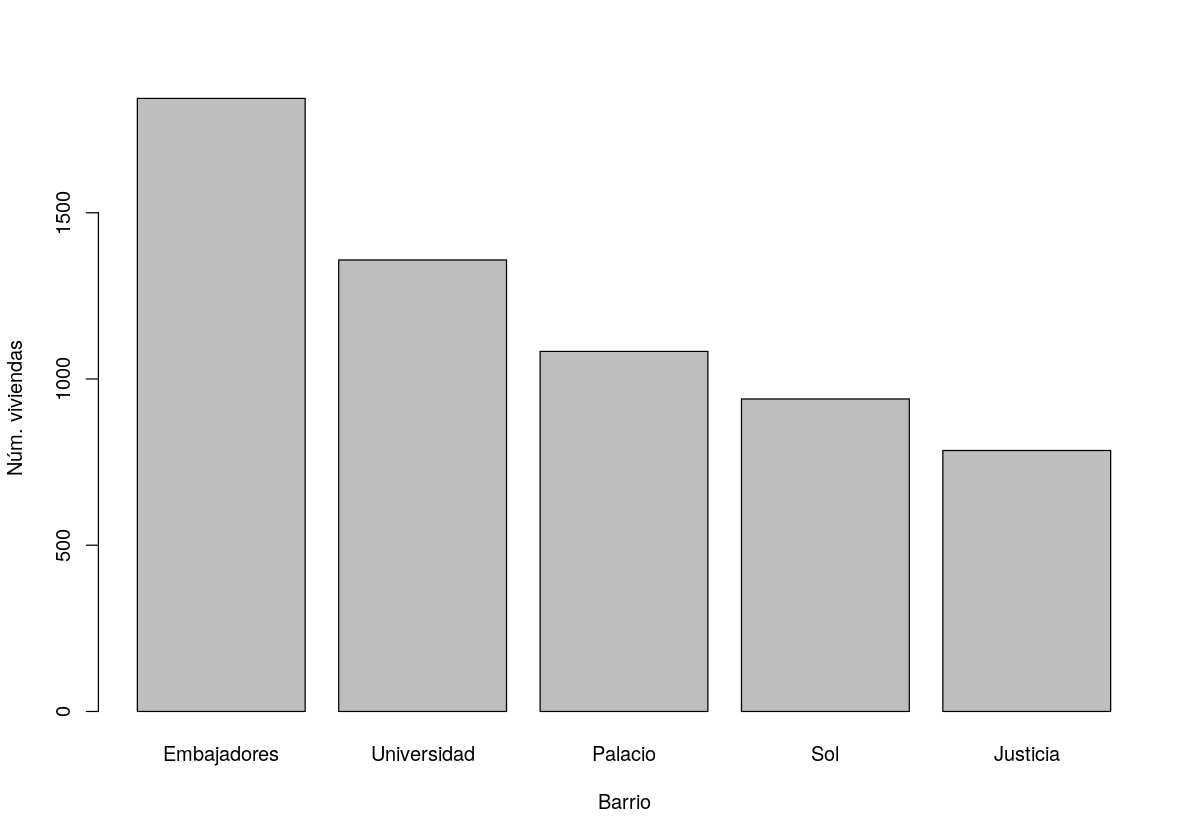

In [24]:
plot(factor(airbnb$Barrio,
            levels = names(sort(table(airbnb$Barrio), decreasing = TRUE))[1:5]),
             xlab="Barrio", ylab="Núm. viviendas")

<span style="color:#051367">¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?</span>

In [25]:
length(unique(airbnb$TipoAlquiler))

[1] 3

In [26]:
unique(airbnb$TipoAlquiler)

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

In [27]:
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

<span style="color:#051367">Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler</span>

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


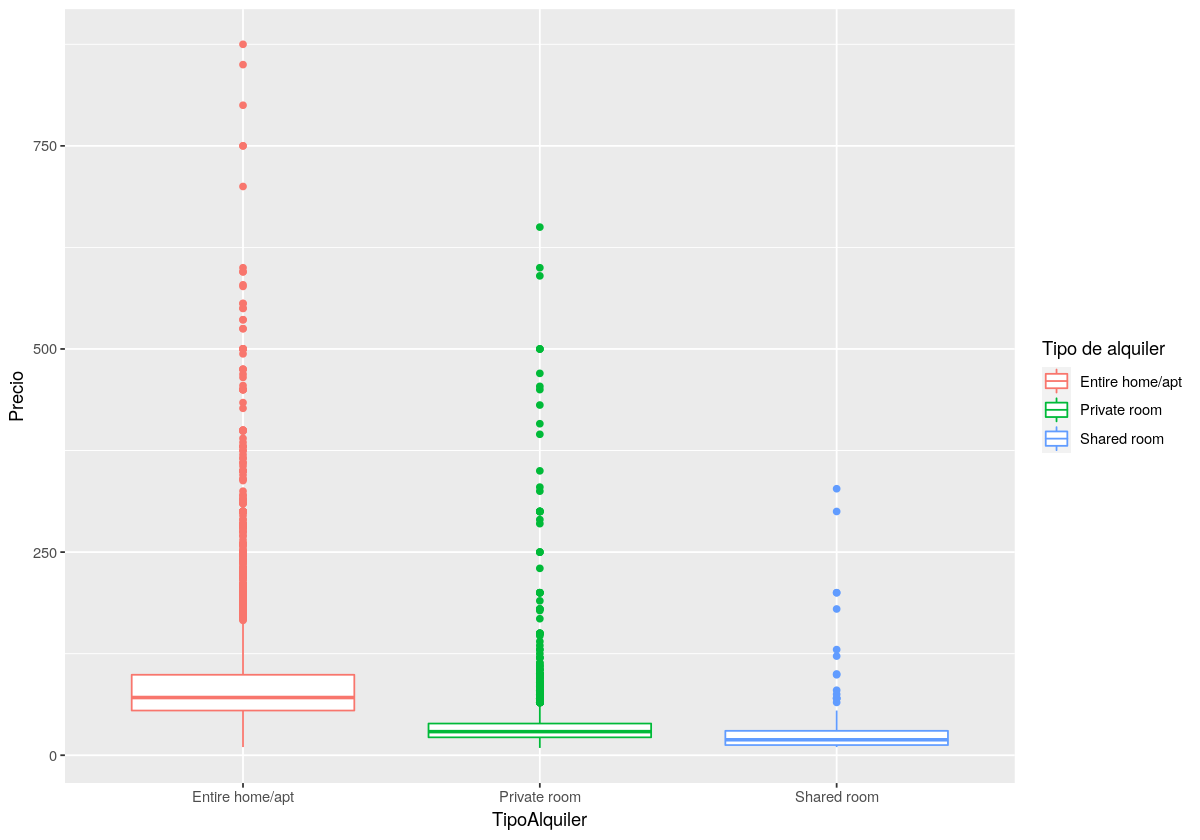

In [28]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
        geom_boxplot()+
        scale_color_discrete(name="Tipo de alquiler")+
        ylab('Precio')

<span style="color:#051367">Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa? ¿Con que test lo comprobarías?</span>

In [29]:
entire_home <- subset(airbnb, TipoAlquiler=='Entire home/apt')
paste("El precio medio de alquiler del tipo Entire home/apt es: ",
      round((mean((entire_home$Precio), na.rm=TRUE)),2),"€")

private_room <- subset(airbnb, TipoAlquiler=='Private room')
paste("El precio medio de alquiler del tipo Private room es: ",
      round((mean((private_room$Precio), na.rm=TRUE)),2),"€")

shared_room <- subset(airbnb, TipoAlquiler=='Shared room')
paste("El precio medio de alquiler del tipo Shared room es: ",
      round((mean((shared_room$Precio), na.rm=TRUE)),2),"€")

[1] "El precio medio de alquiler del tipo Entire home/apt es:  87.3 €"

[1] "El precio medio de alquiler del tipo Private room es:  34.26 €"

[1] "El precio medio de alquiler del tipo Shared room es:  29.85 €"

In [30]:
#shared_room <- airbnb[which(airbnb$TipoAlquiler=='Shared room'), ]

In [31]:
airbnb_na <- airbnb[!is.na(airbnb$Precio),]

entire <- subset(airbnb_na, TipoAlquiler=='Entire home/apt')
room <- subset(airbnb_na, TipoAlquiler=='Private room')
shared <- subset(airbnb_na, TipoAlquiler=='Shared room')

#shapiro.test(airbnb_na$Precio)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



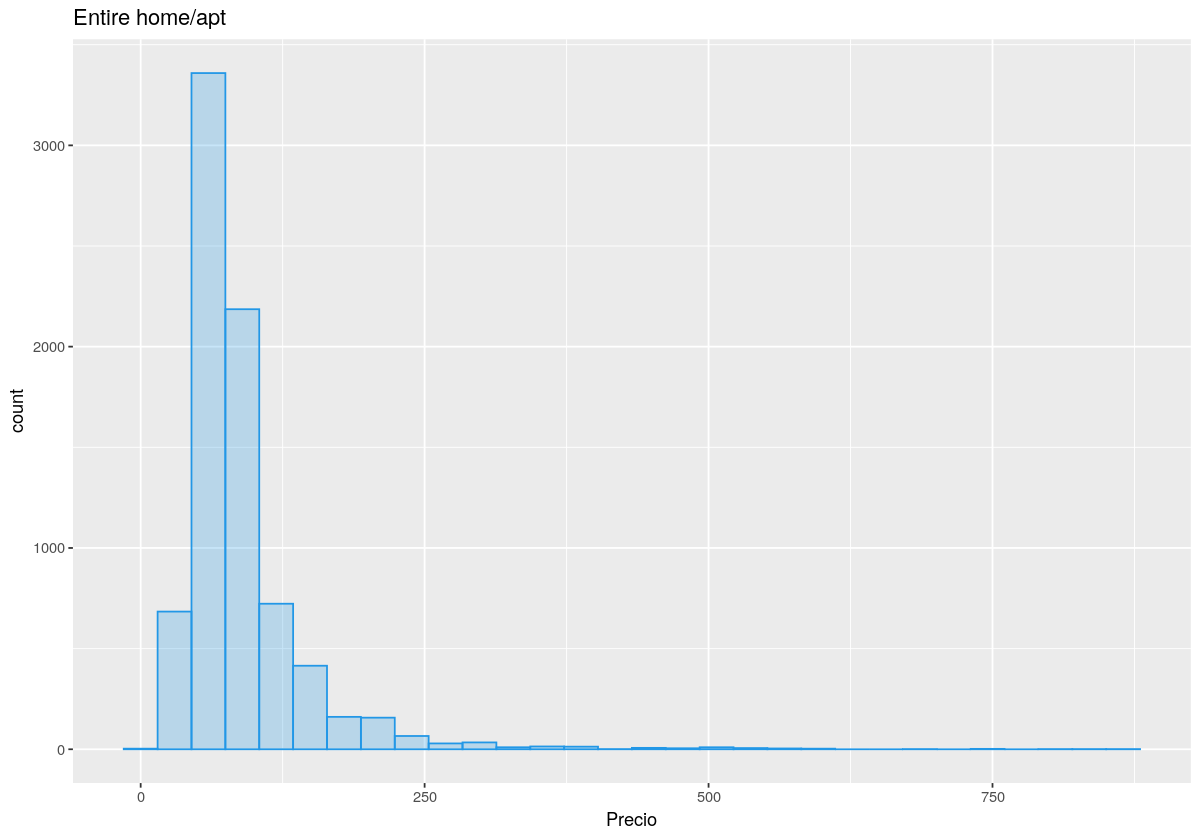

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



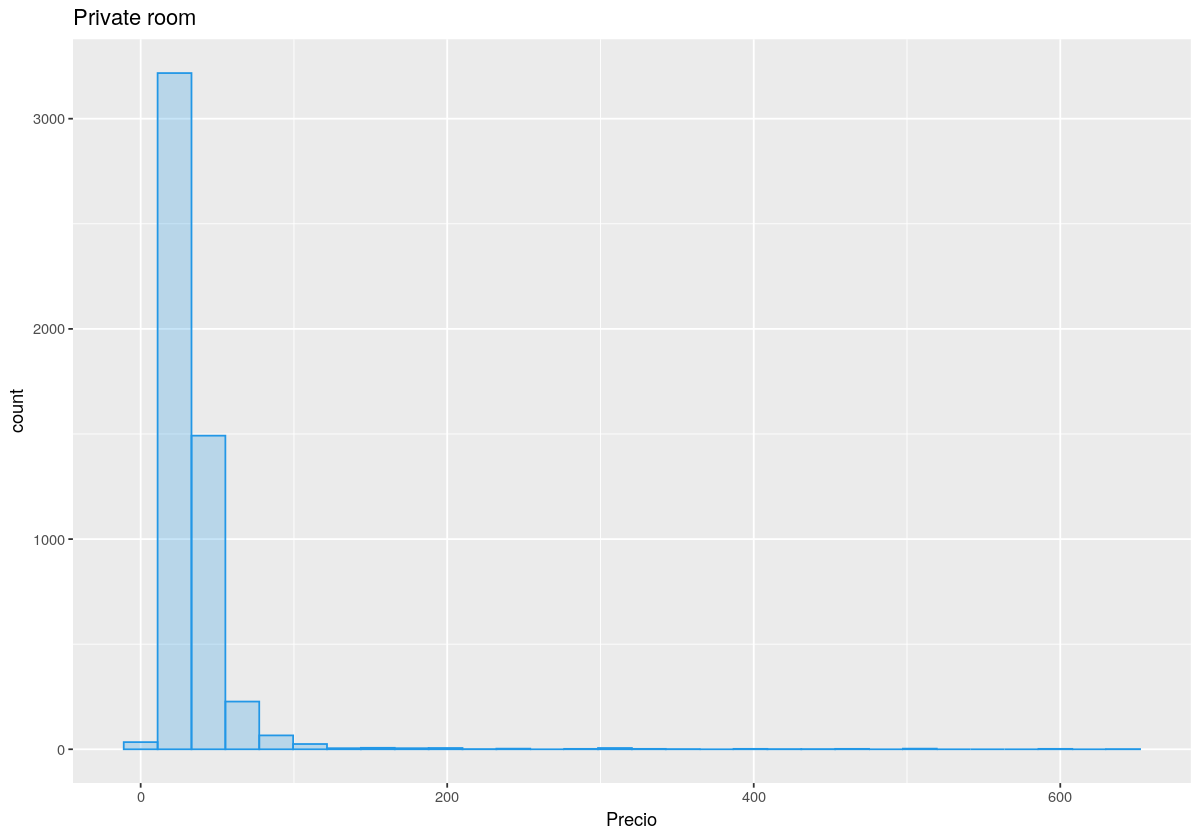

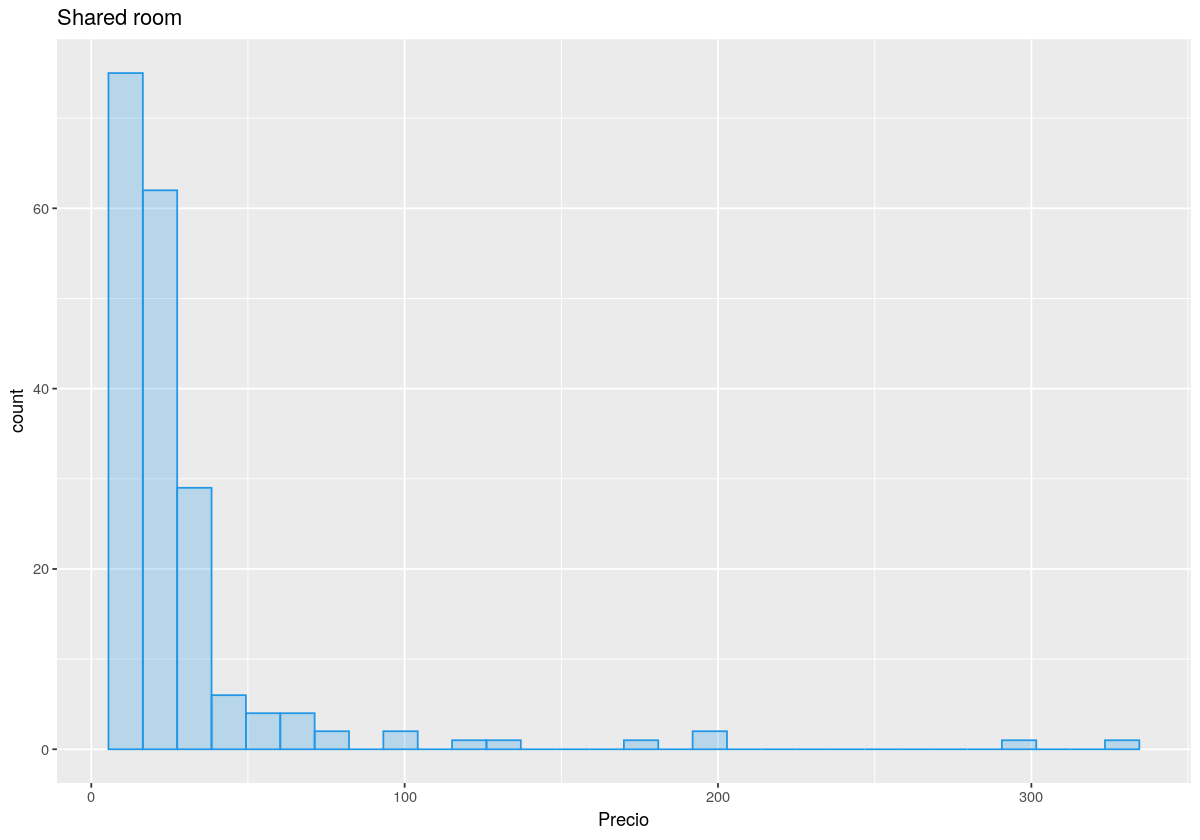

In [32]:
#Dibujar histogramas para comprobar la distribución de datos

ggplot(entire, aes(x=Precio)) + geom_histogram(col = 4, fill = 4, alpha=0.25) + ggtitle("Entire home/apt")
ggplot(room, aes(x=Precio)) + geom_histogram(col = 4, fill = 4, alpha=0.25) + ggtitle("Private room")
ggplot(shared, aes(x=Precio)) + geom_histogram(col = 4, fill = 4, alpha=0.25) + ggtitle("Shared room")

In [33]:
print("Entire home/apt")
shapiro.test(entire$Precio[0:5000])

print("Private room")
shapiro.test(room$Precio[0:5000])

print("Shared room")
shapiro.test(shared$Precio)

[1] "Entire home/apt"



	Shapiro-Wilk normality test

data:  entire$Precio[0:5000]
W = 0.64988, p-value < 2.2e-16


[1] "Private room"



	Shapiro-Wilk normality test

data:  room$Precio[0:5000]
W = 0.38263, p-value < 2.2e-16


[1] "Shared room"



	Shapiro-Wilk normality test

data:  shared$Precio
W = 0.4436, p-value < 2.2e-16


<span style="color:#5D8BF4">Con un *p-value < 2.2e-16* podemos decir que nuestros datos no presentan una distribución normal, gaussina, por lo que para comprobar si la diferencia es estadísticamente significativa usaremos el test de **Kruskal-Wallis**. </span>

In [34]:
kruskal.test(Precio ~ TipoAlquiler, data = airbnb_na)


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


<span style="color:#5D8BF4"> Con un *p-value < 2.2e-16* podemos afirmar que **existe una diferencia estadísticamente significativa** entre al menos dos de los grupos. </span>

In [35]:
#En la comparación por pares vemos que la diferencia significativa se encuentra entre los tres tipos

#pairwise.wilcox.test(x = airbnb_na$Precio, g = airbnb_na$TipoAlquiler, p.adjust.method = "holm" )

<span style="color:#051367">Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado *airbnb_entire*. Estas serán las entradas que tienen un alquiler del piso completo.</span>

In [36]:
airbnb_entire <- airbnb[which(airbnb$TipoAlquiler=='Entire home/apt'), ]

In [37]:
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


<span style="color:#051367">¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?</span>

**Nota**: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [38]:
summary(factor(airbnb_entire$Barrio,
               levels = names(sort(table(airbnb_entire$Barrio), decreasing = TRUE))[1:5]))

Embajadores Universidad     Palacio         Sol      Cortes        NA's 
       1228         984         769         701         574        3647

<span style="color:#051367">¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?</span>

<span style="color:#051367">¿Cual es su precio medio?</span>

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [39]:
precio_medio <- aggregate(Precio ~ Barrio, airbnb_entire, mean,na.rm=TRUE)

In [40]:
head(precio_medio)

,Barrio,Precio
,<fct>,<dbl>
1,Abrantes,46.00000
2,Acacias,68.16393
3,Adelfas,68.72727
4,Aeropuerto,38.00000
5,Aguilas,54.50000
6,Alameda de Osuna,138.75000


In [41]:
is.ordered(precio_medio$Precio)

[1] FALSE

In [42]:
precio_medio[(order(precio_medio$Precio, decreasing = TRUE))[1:5], ]

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


<span style="color:#051367">¿Cuantos apartamentos hay en cada uno de esos barrios?</span>

<span style="color:#051367">Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.</span>


Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [43]:
summary(airbnb_entire$Barrio)

Embajadores                  Universidad 
                        1228                          984 
                     Palacio                          Sol 
                         769                          701 
                      Cortes                     Justicia 
                         574                          534 
                   Trafalgar                    Argüelles 
                         223                          143 
                        Goya              Palos de Moguer 
                         142                          135 
                   Recoletos                     Arapiles 
                         135                           98 
                     Almagro                   Guindalera 
                          97                           82 
            Puerta del Angel                   Castellana 
                          77                           73 
              Cuatro Caminos                        Lista 
                          72                           72 
                       Ibiza                    Jerónimos 
                          64                           62 
                    Pacífico                      Acacias 
                          62                           61 
                  Gaztambide                   Rios Rosas 
                          61                           60 
              Hispanoamérica                     Delicias 
                          52                           51 
                 Prosperidad                Bellas Vistas 
                          49                           45 
                 Castillejos                     Imperial 
                          44                           42 
                Nueva España                Casa de Campo 
                          42                           41 
                  San Isidro             Fuente del Berro 
                          39                           38 
                  Berruguete                      Chopera 
                          35                           34 
                    Numancia                      Adelfas 
                          34                           33 
                Vallehermoso                Ciudad Jardín 
                          33                           32 
                   San Diego                       Ventas 
                          32                           26 
                    Almenara                Valdeacederas 
                          25                           25 
                     El Viso                 Valdefuentes 
                          24                           24 
                Vista Alegre                     Castilla 
                          22                           21 
                    Comillas                     Simancas 
                          21                           21 
                    Valverde                  Almendrales 
                          19                           18 
 Casco Histórico de Vallecas                     Moscardó 
                          18                           18 
                    Quintana                   Concepción 
                          17                           16 
                    Canillas                   Niño Jesús 
                          15                           15 
                     Legazpi                Puerta Bonita 
                          14                           14 
        Ciudad Universitaria                  Costillares 
                          13                           13 
                      Lucero                 Pueblo Nuevo 
                          13                           13 
           San Juan Bautista                   Buenavista 
                          13                           12 
                  San Andrés                   Peñagrande 
                          12                           11 
     

In [44]:
Freq <- aggregate(airbnb_entire$Precio, list(airbnb_entire$Barrio), length)
names(Freq)<-c("Barrio","Freq")
head(Freq)

,Barrio,Freq
,<fct>,<int>
1,Abrantes,3
2,Acacias,61
3,Adelfas,33
4,Aeropuerto,2
5,Aguilas,2
6,Alameda de Osuna,4


In [45]:
airbnb_entire_new <- merge(precio_medio, Freq, by="Barrio")
colnames(airbnb_entire_new)[2] <- "PrecioMedio"
airbnb_entire_new[(order(airbnb_entire_new$Precio, decreasing = TRUE))[1:5], ]

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


<span style="color:#051367">Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.</span>

In [46]:
mayor100df <- airbnb_entire_new[(which(airbnb_entire_new$Freq > 100)),]

In [47]:
mayor100df[(order((mayor100df$Precio), decreasing = TRUE))[1:5], ]

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


<span style="color:#051367">Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.</span>

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


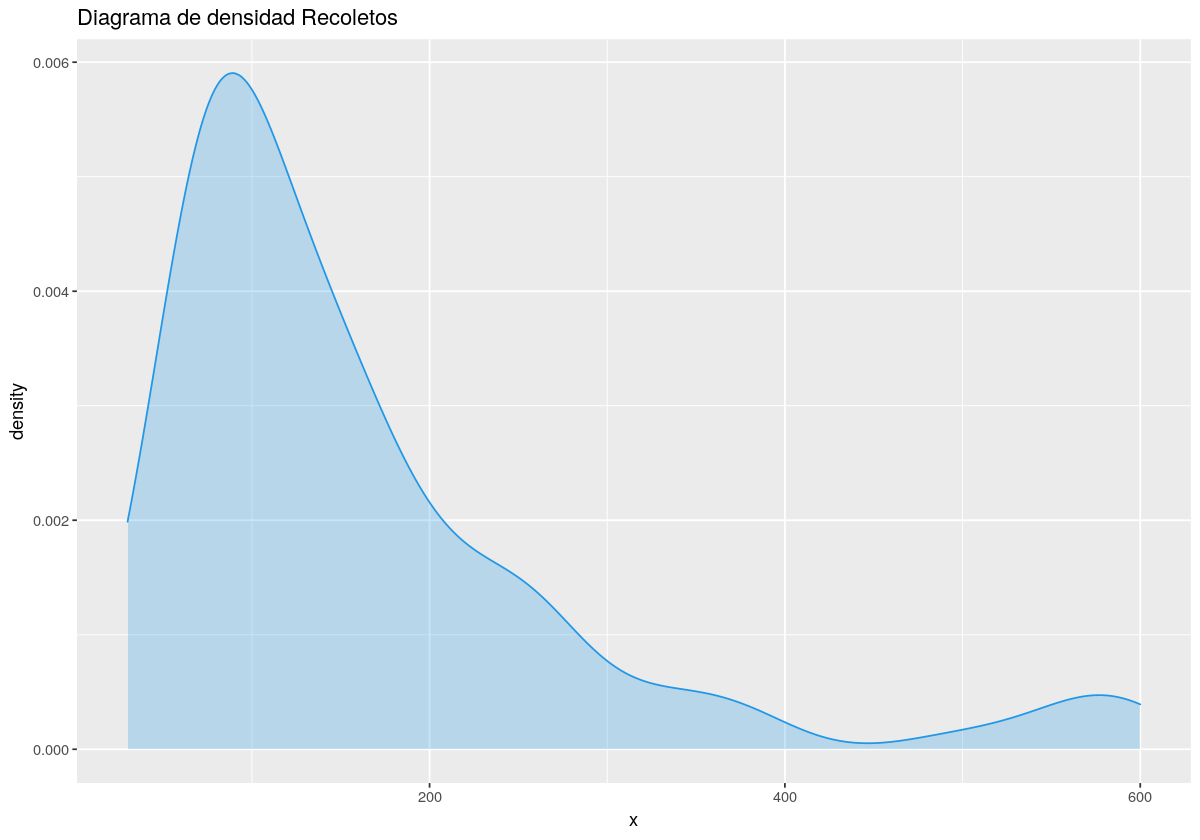

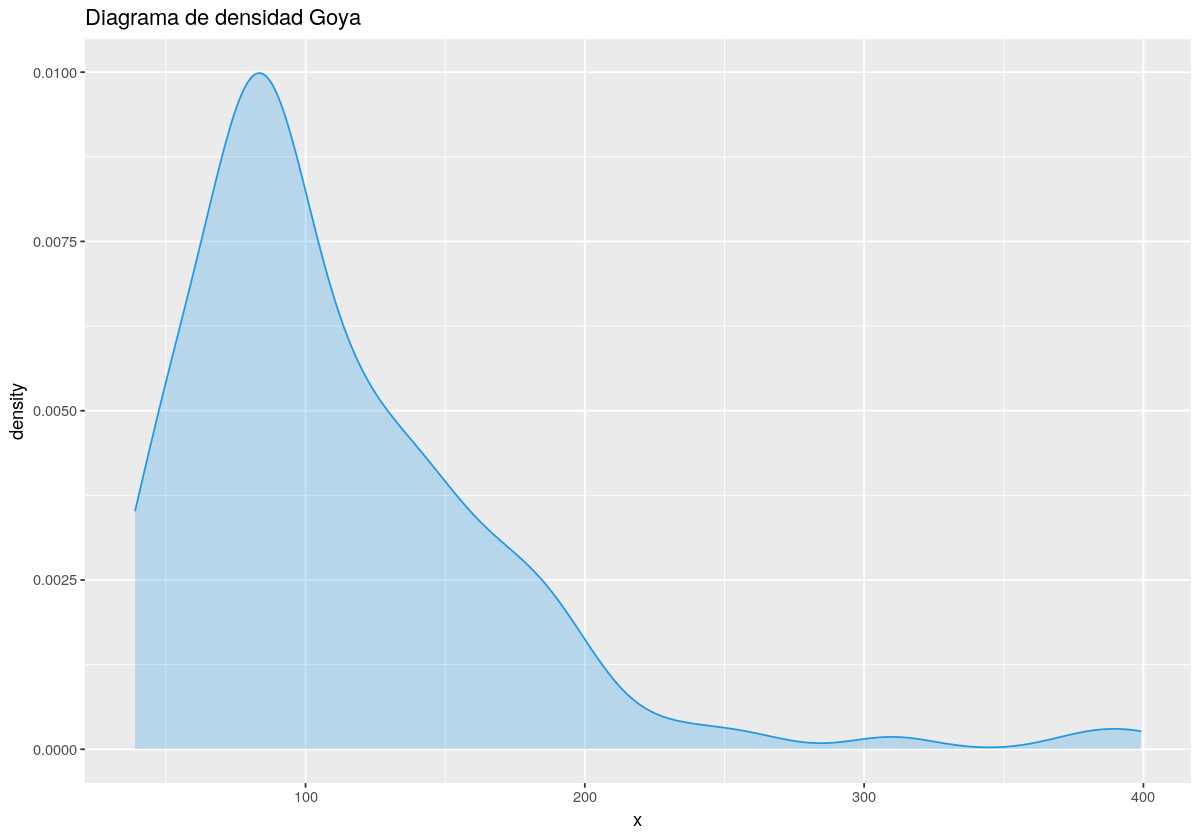

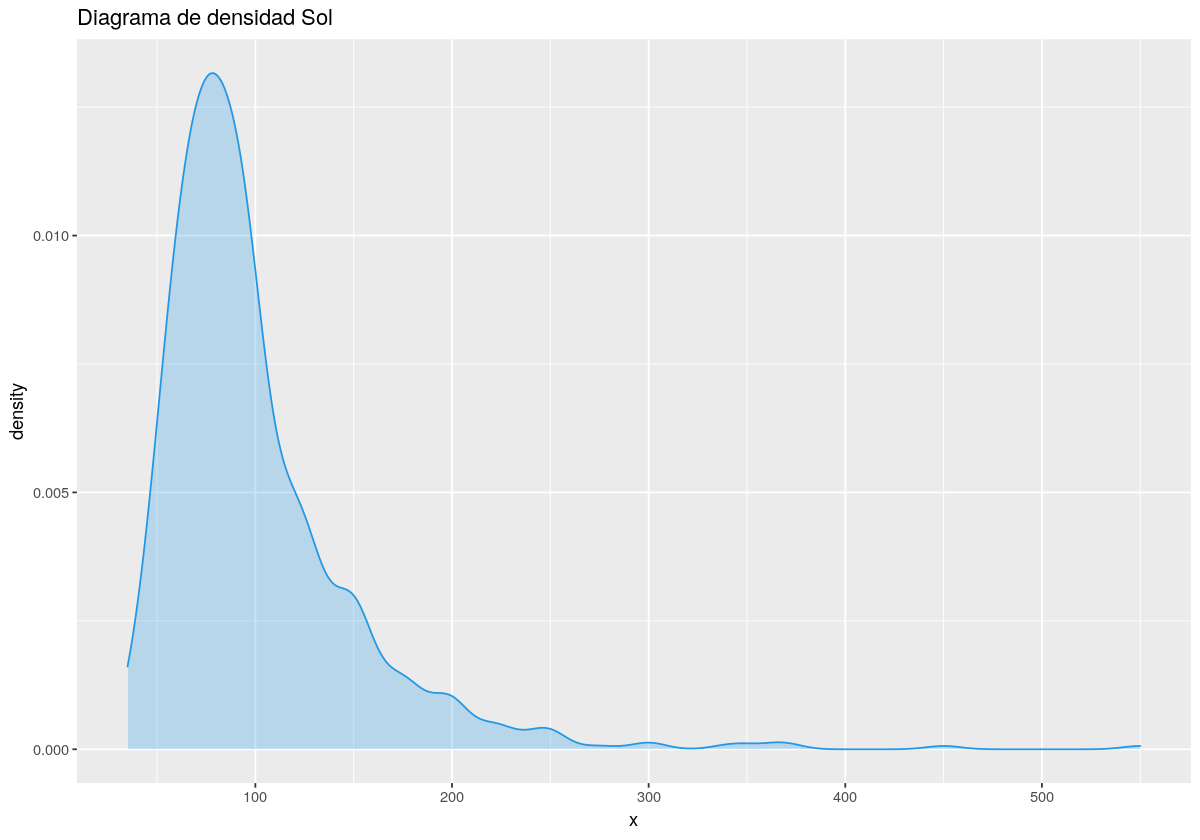

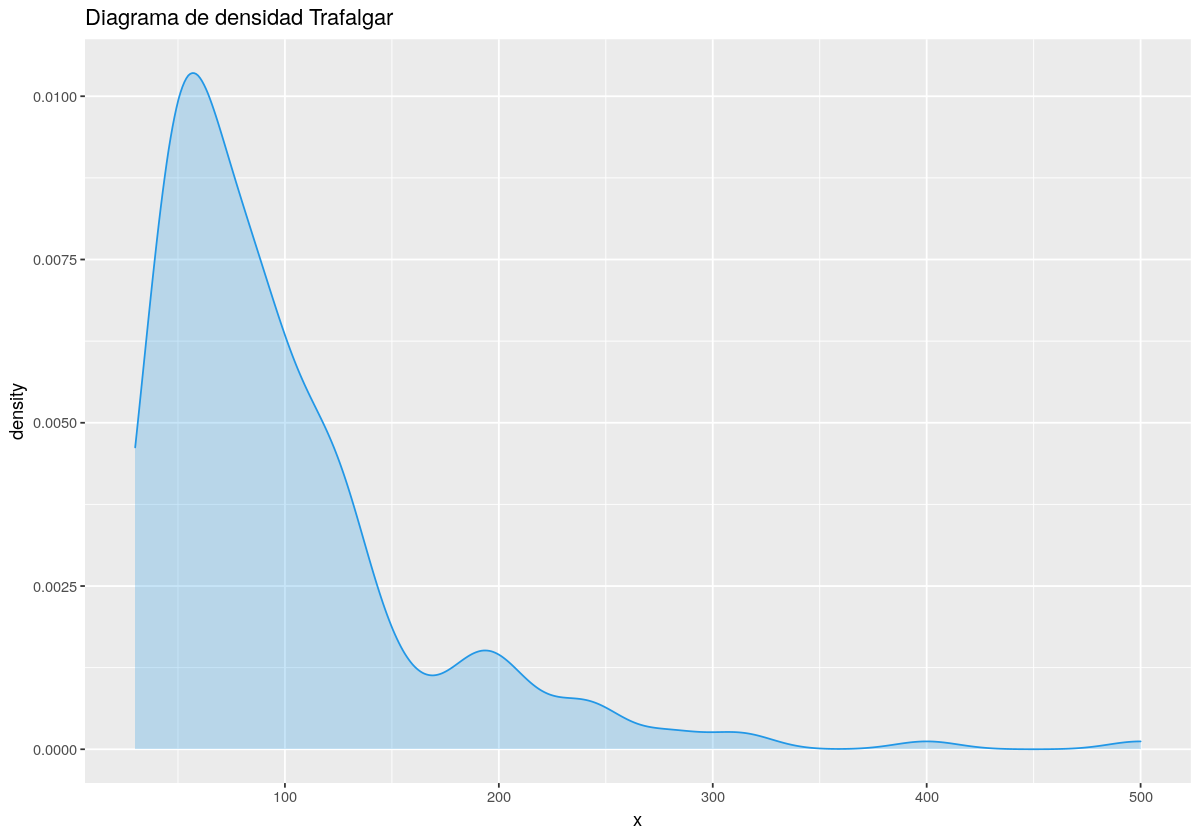

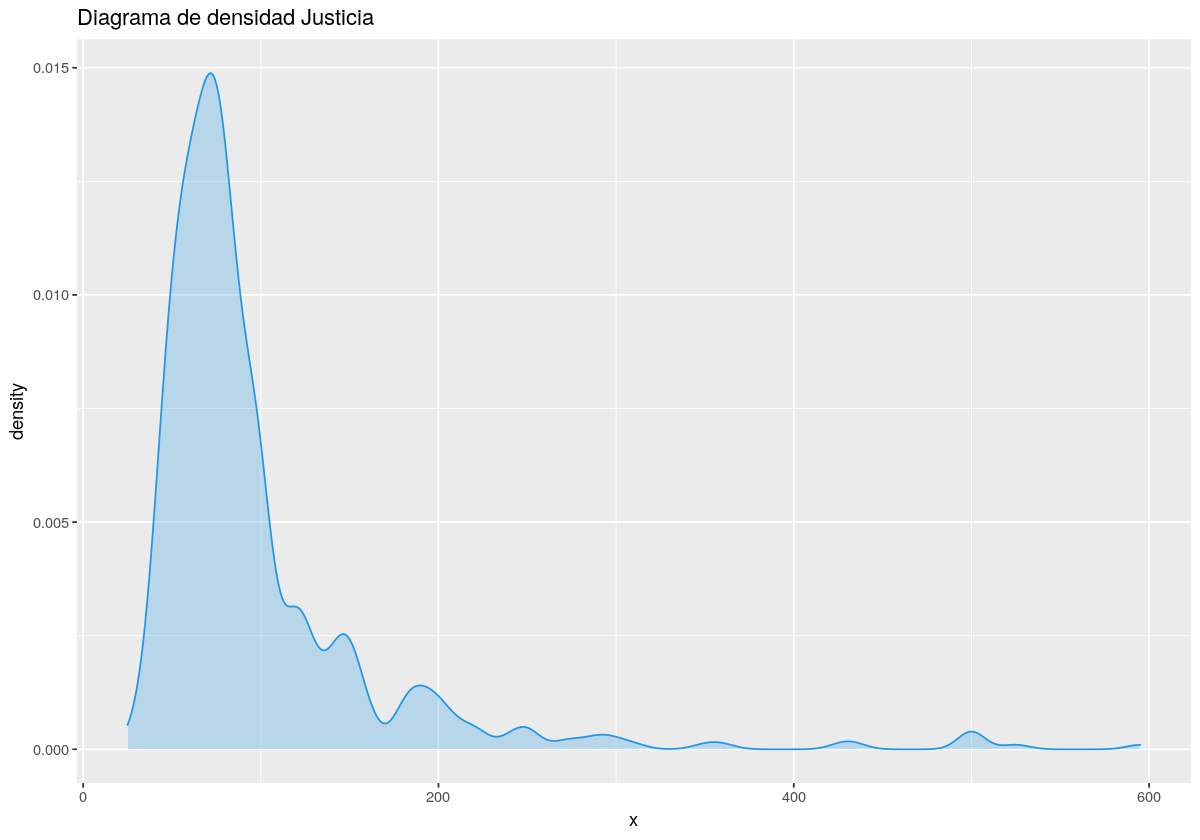

In [48]:
recoletos <- subset(airbnb_entire, Barrio == "Recoletos")
ggplot(data=data.frame(x=recoletos$Precio), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+ 
    ggtitle("Diagrama de densidad Recoletos")

goya <- subset(airbnb_entire, Barrio == "Goya")
ggplot(data=data.frame(x=goya$Precio), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Goya")

sol <- subset(airbnb_entire, Barrio == "Sol")
ggplot(data=data.frame(x=sol$Precio), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Sol")

trafalgar <- subset(airbnb_entire, Barrio == "Trafalgar")
ggplot(data=data.frame(x=trafalgar$Precio), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Trafalgar")

justicia <- subset(airbnb_entire, Barrio == "Justicia")
ggplot(data=data.frame(x=justicia$Precio), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Justicia")

<span style="color:#051367">Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas</span>

In [49]:
#precio_medio <- aggregate(airbnb_entire$Precio, list(airbnb_entire$Barrio), mean, na.rm=TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 139 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 517 rows containing non-finite values (stat_bin).”


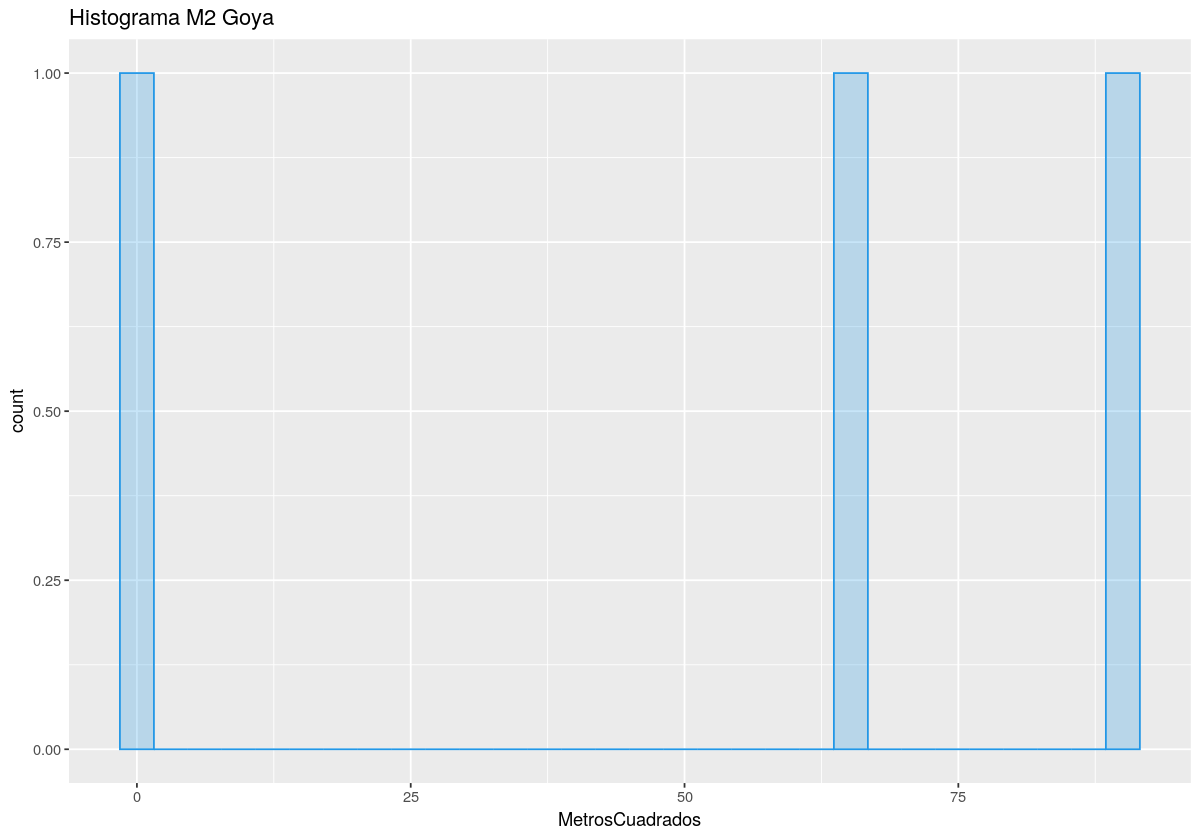

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”


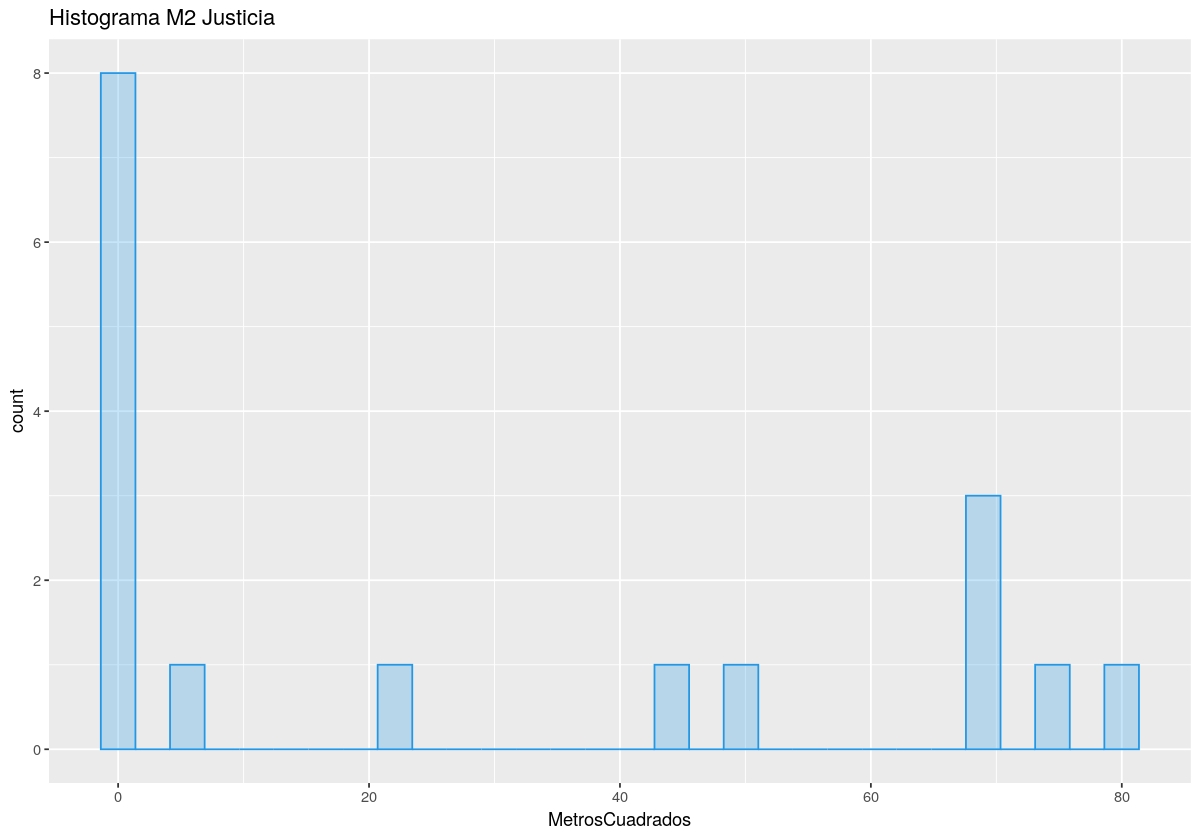

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


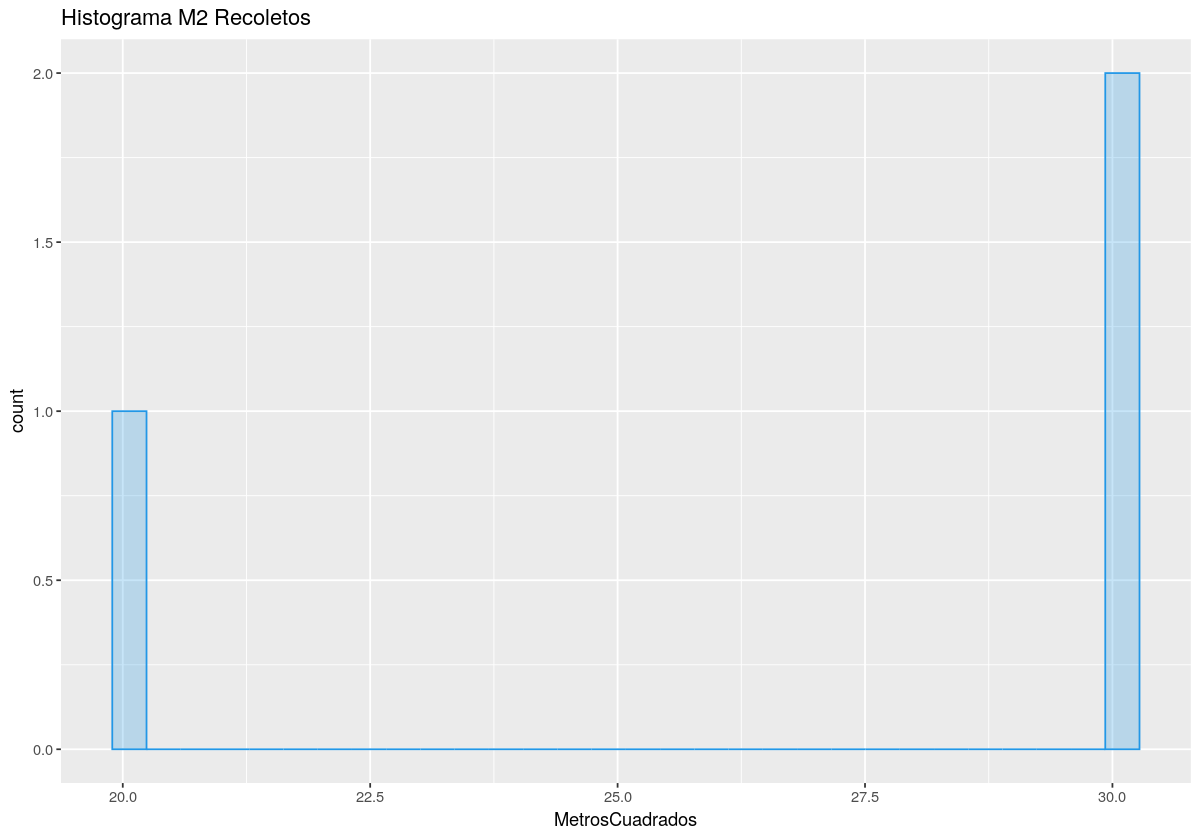

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 216 rows containing non-finite values (stat_bin).”


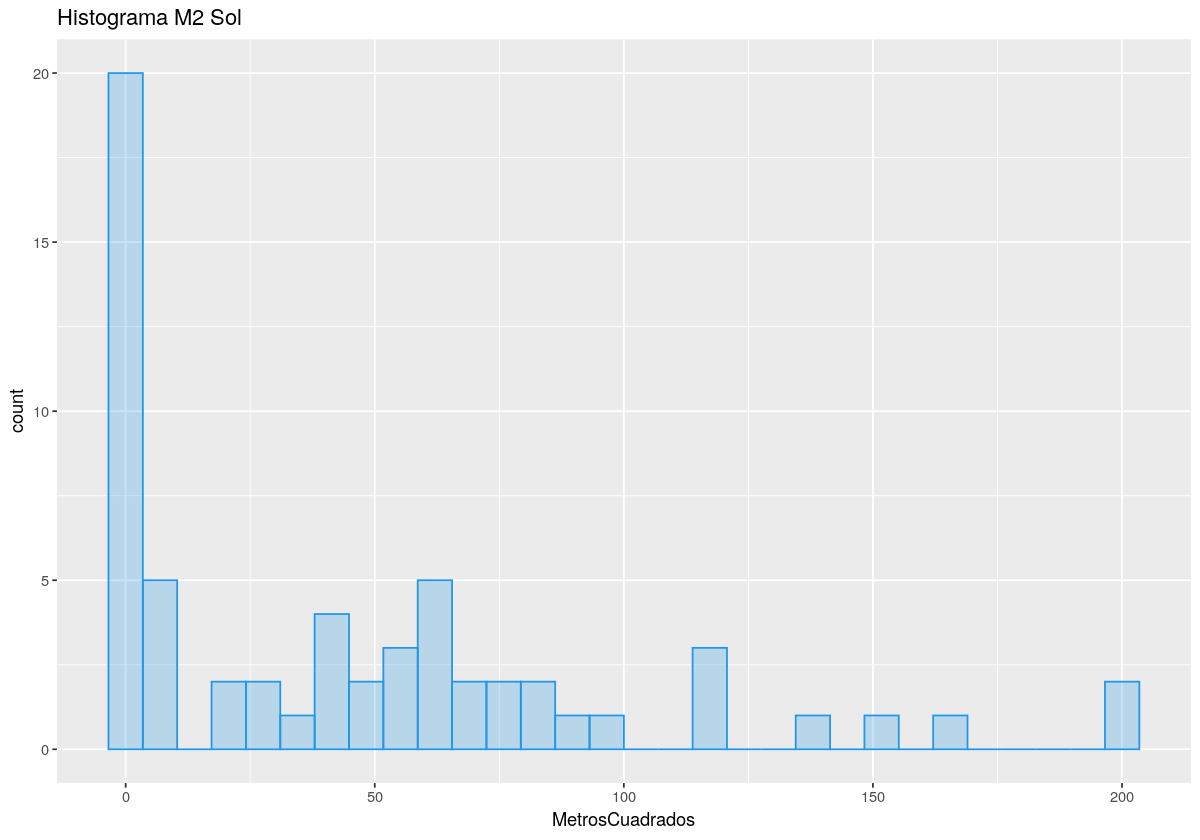

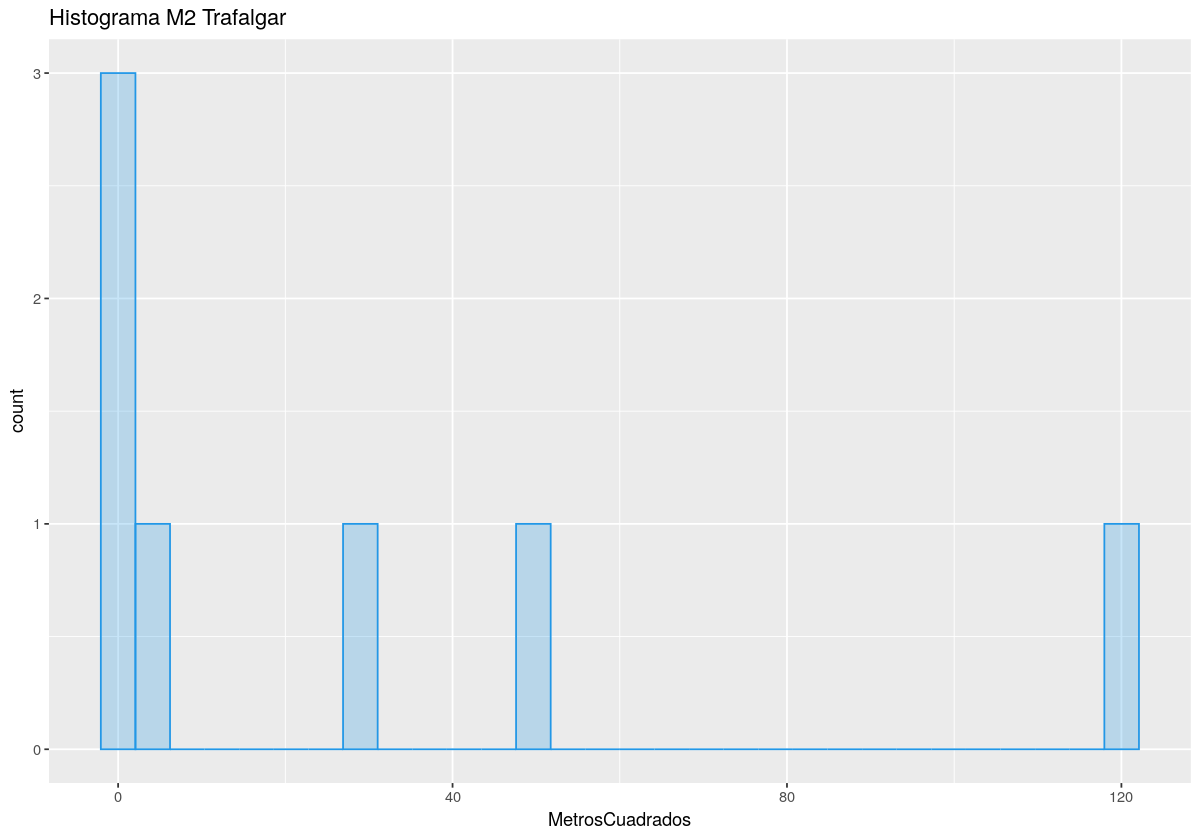

In [50]:
#comprobamos datos -> 
ggplot(goya, aes(x=MetrosCuadrados))+
    geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Histograma M2 Goya")

ggplot(justicia, aes(x=MetrosCuadrados))+
    geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Histograma M2 Justicia")

ggplot(recoletos, aes(x=MetrosCuadrados))+
    geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Histograma M2 Recoletos")

ggplot(sol, aes(x=MetrosCuadrados))+
    geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Histograma M2 Sol")

ggplot(trafalgar, aes(x=MetrosCuadrados))+
    geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Histograma M2 Trafalgar")

In [51]:
#tras realizar histogramas de cada grupo se plantea filtrar los siguientes datos
airbnb_m2 <- subset(airbnb_entire, MetrosCuadrados != 0)
airbnb_m2 <- subset(airbnb_m2, MetrosCuadrados > 10)

mcuadrados_media <- aggregate(airbnb_m2$MetrosCuadrados, list(airbnb_m2$Barrio), mean, na.rm=TRUE)
names(mcuadrados_media)<-c("Barrio","m2Media")
prmed_m2med <- merge(airbnb_entire_new, mcuadrados_media, by = "Barrio")

prmed_m2med |> filter(Barrio %in% c("Recoletos", "Goya", "Sol", "Trafalgar", "Justicia"))

Barrio,PrecioMedio,Freq,m2Media
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,77.52755
Justicia,98.25468,534,59.98050
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,77.37493
Trafalgar,98.57848,223,66.67339


<span style="color:#051367">Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.</span>

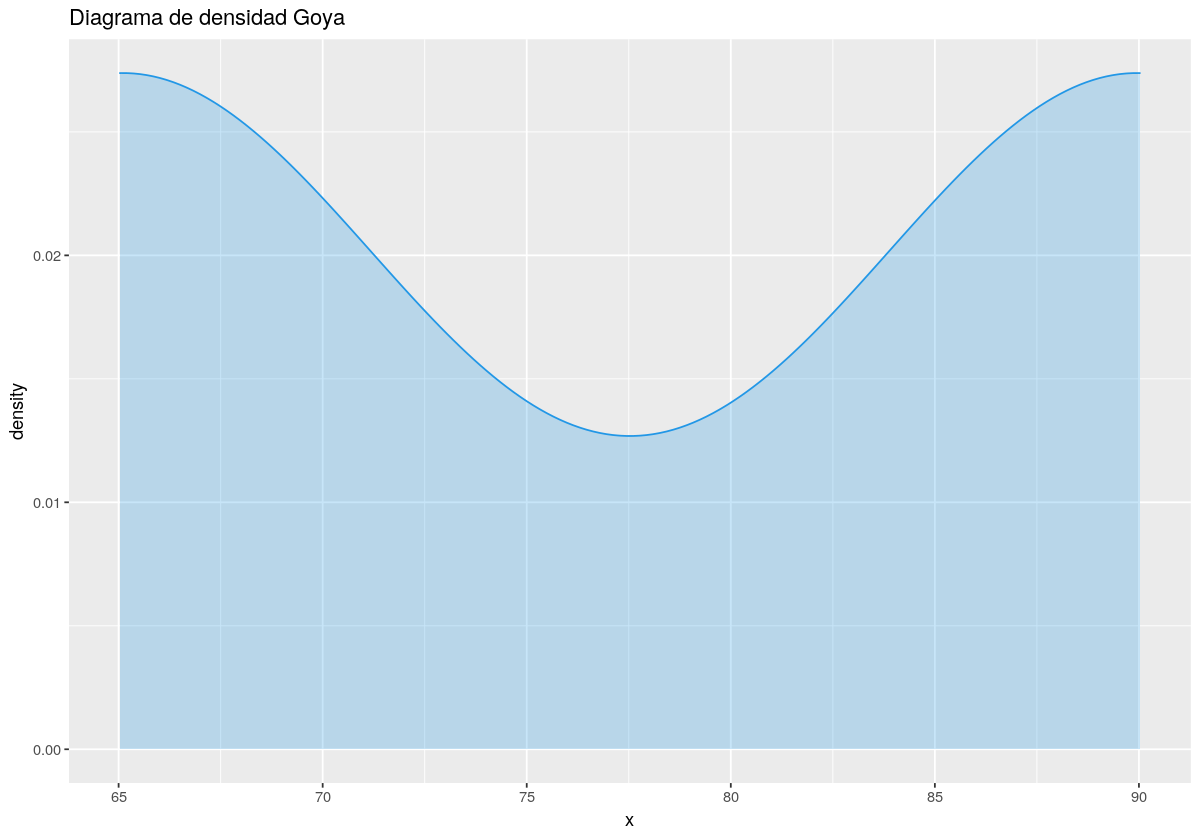

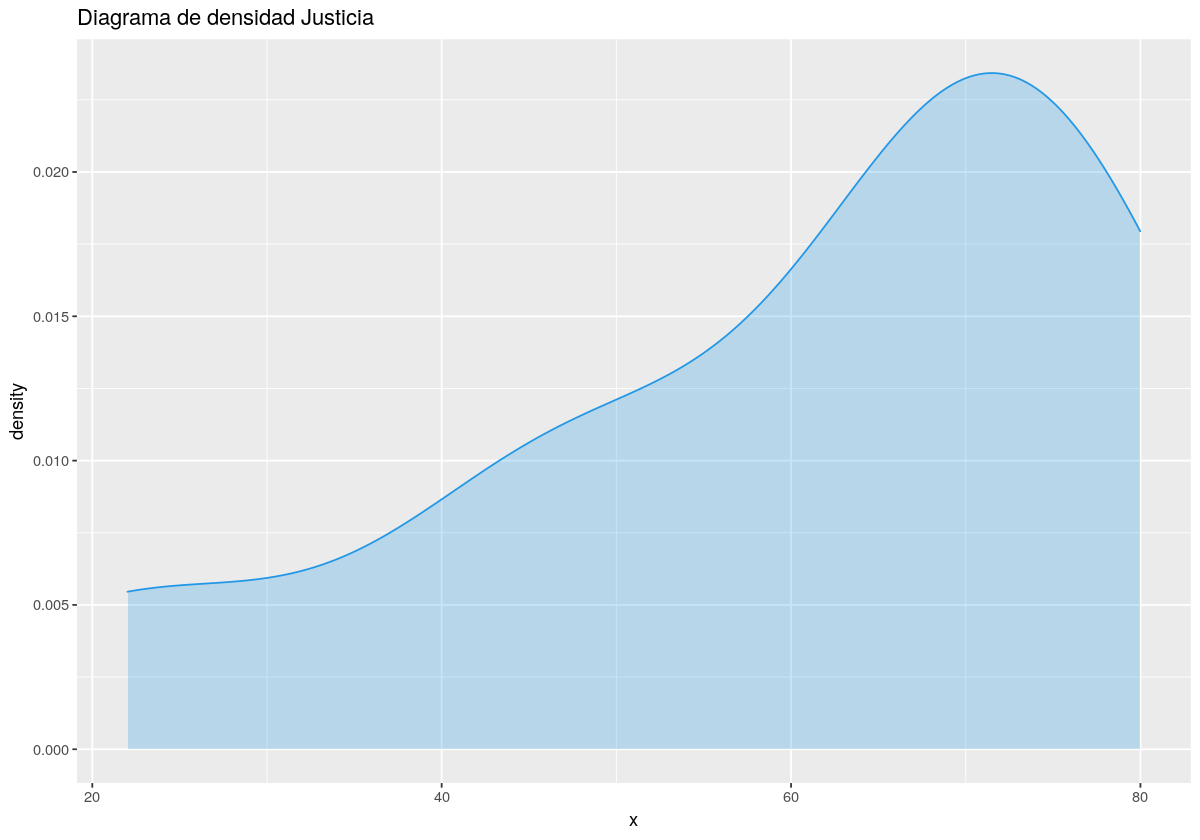

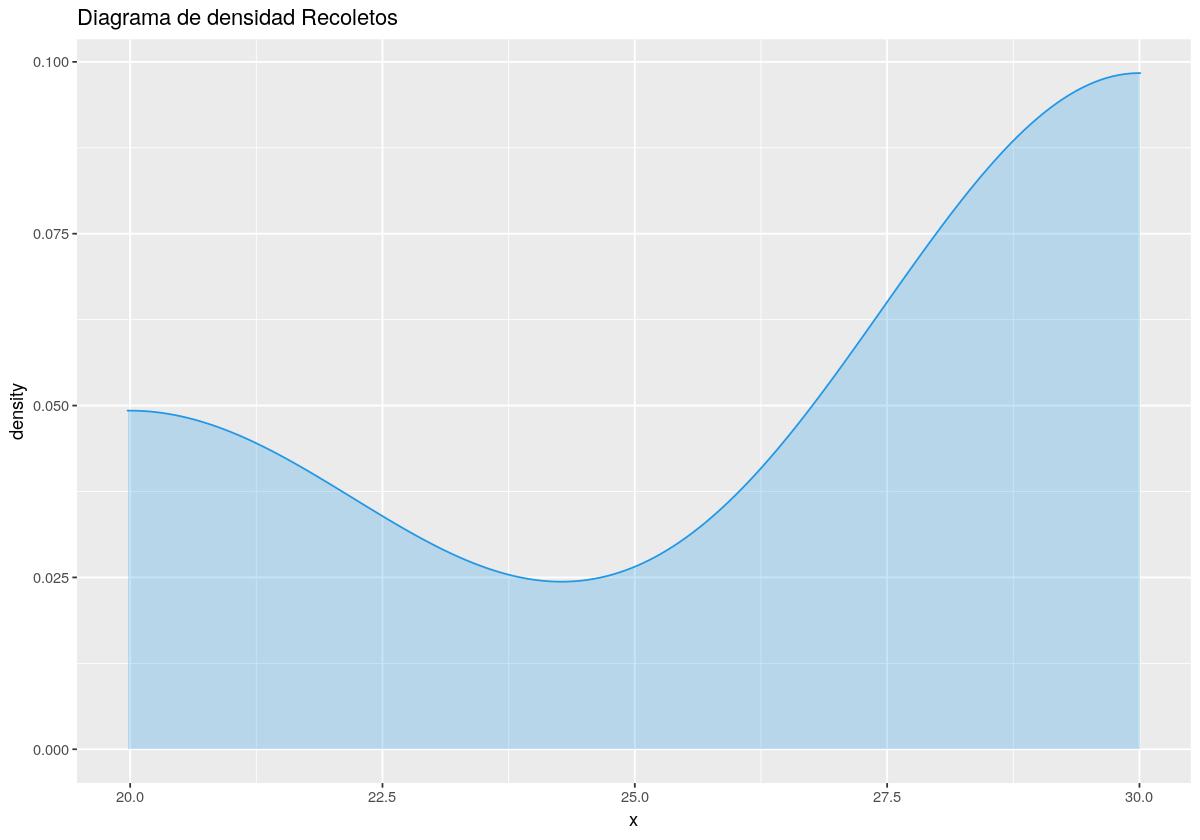

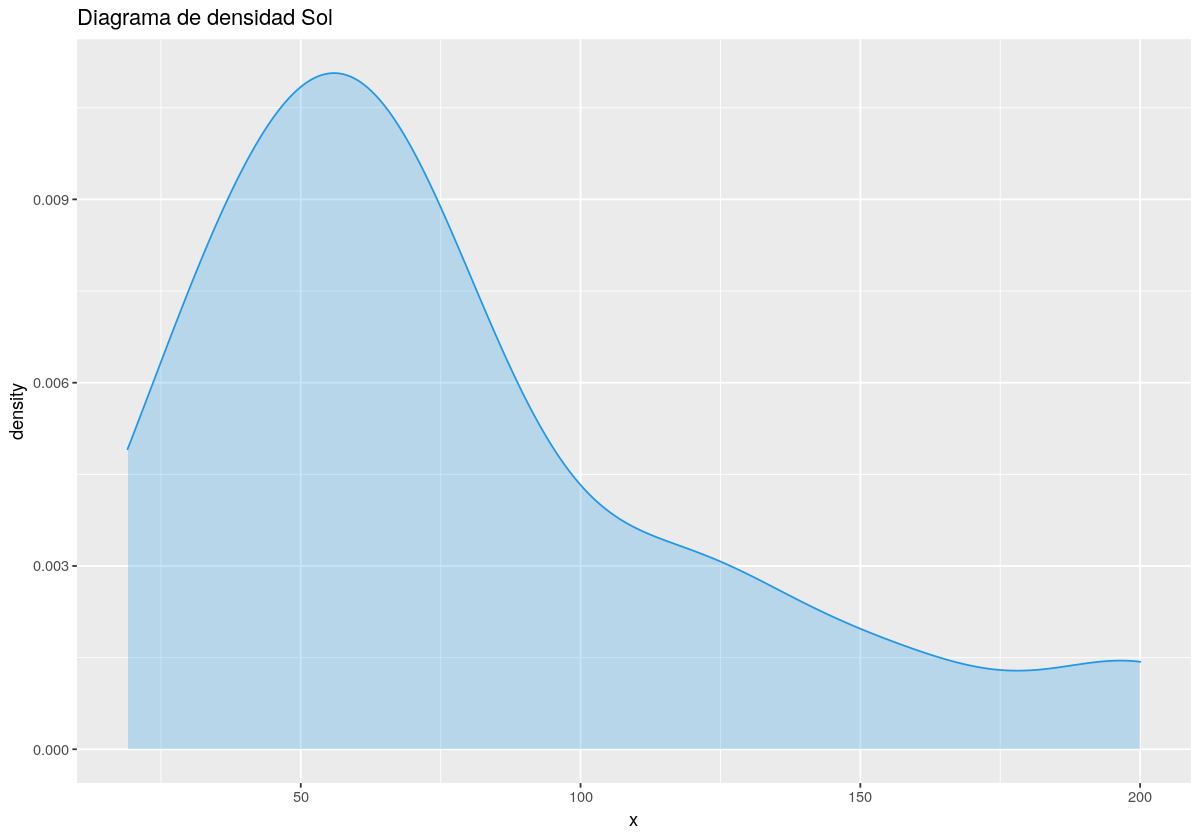

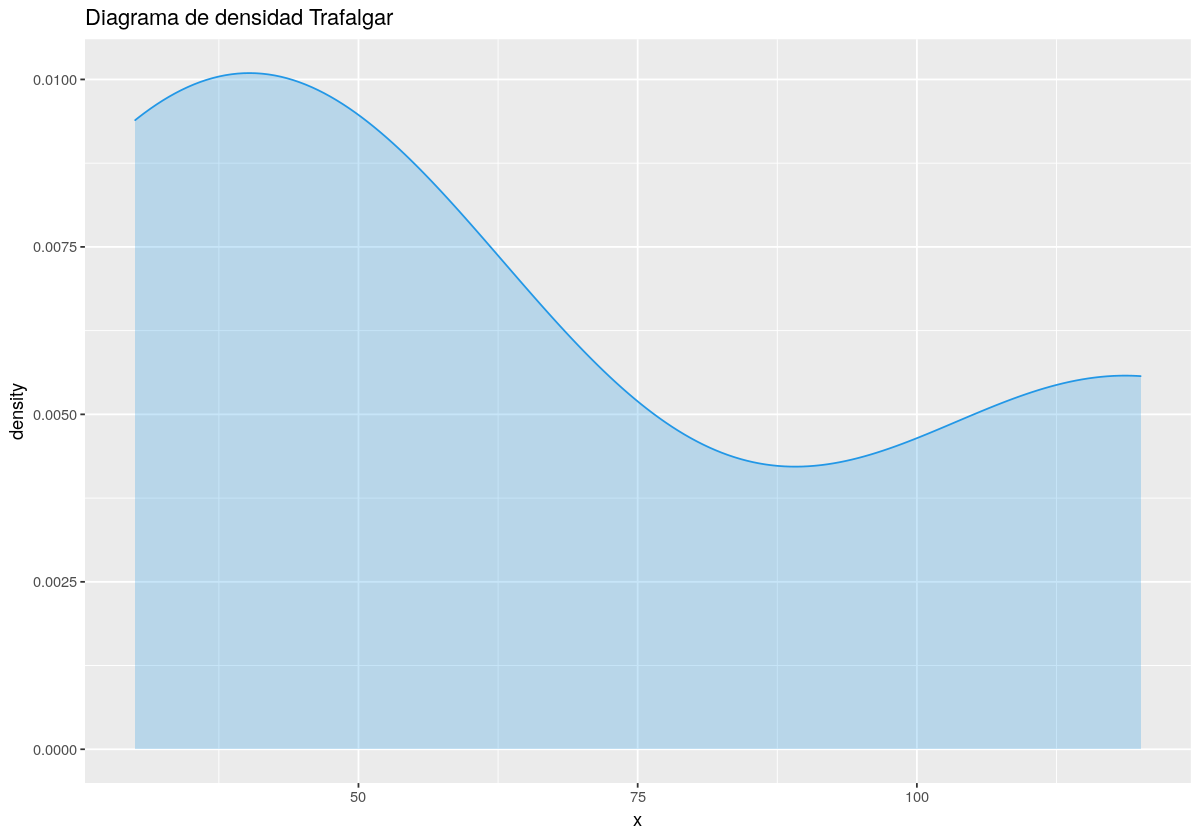

In [52]:
goya <- subset(airbnb_m2, Barrio == "Goya")
ggplot(data=data.frame(x=goya$MetrosCuadrados), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Goya")

justicia <- subset(airbnb_m2, Barrio == "Justicia") 
ggplot(data=data.frame(x=justicia$MetrosCuadrados), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Justicia")

recoletos <- subset(airbnb_m2, Barrio == "Recoletos")
ggplot(data=data.frame(x=recoletos$MetrosCuadrados), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Recoletos")

sol <- subset(airbnb_m2, Barrio == "Sol")
ggplot(data=data.frame(x=sol$MetrosCuadrados), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Sol")

trafalgar <- subset(airbnb_m2, Barrio == "Trafalgar")
ggplot(data=data.frame(x=trafalgar$MetrosCuadrados), aes(x))+
    geom_density(color = 4, fill = 4, alpha = 0.25)+
    scale_x_continuous()+
    ggtitle("Diagrama de densidad Trafalgar")

<span style="color:#051367">Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?</span>


<span style="color:#051367">¿Que test habría que usar para comprobarlo?</span>

<span style="color:#5D8BF4"> Lo primero que vamos a hacer es comprobar la distribución de los datos de nuestras muestras </span>

In [53]:
airbnb_m2 |> filter(Barrio %in% c("Recoletos", "Goya", "Sol", "Trafalgar", "Justicia")) -> new_m2

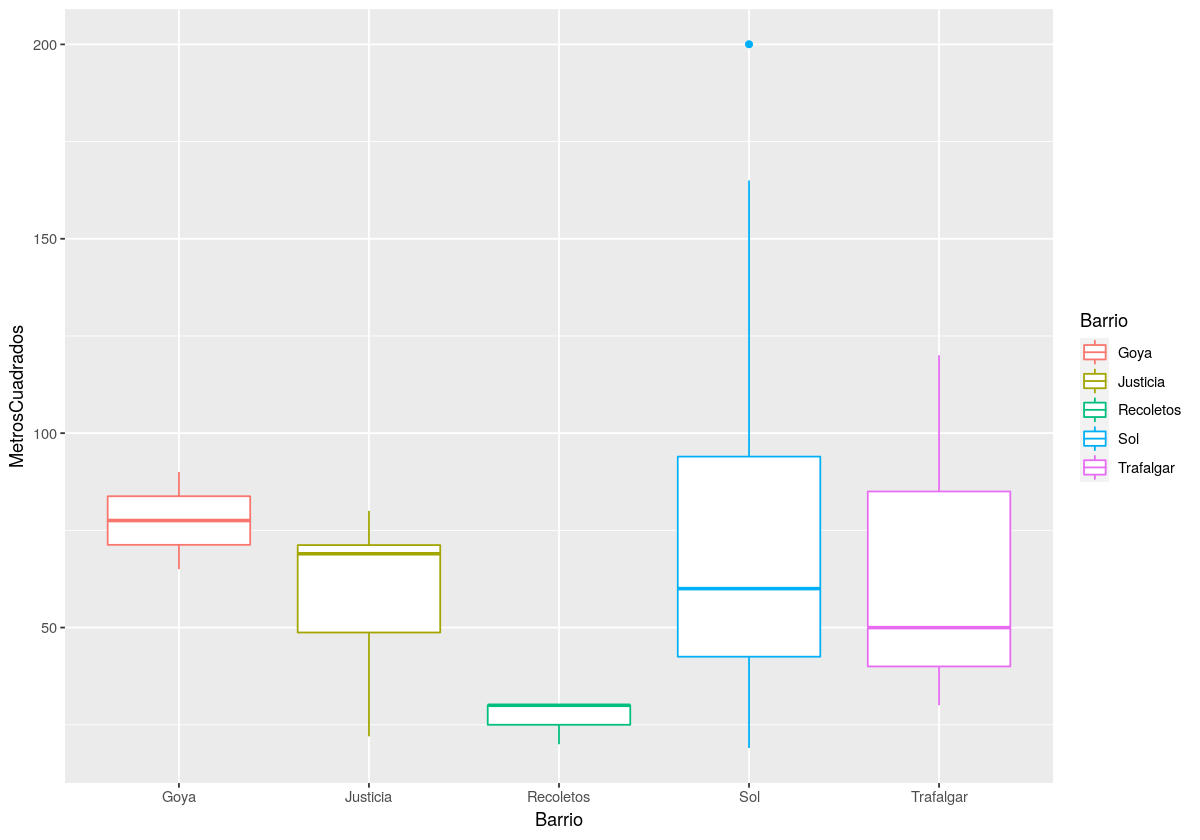

In [54]:
ggplot(data=new_m2,aes(x=Barrio, y=MetrosCuadrados, color=Barrio))+
        geom_boxplot()+
        scale_color_discrete(name="Barrio")+
        ylab('MetrosCuadrados')

In [55]:
#qqnorm(airbnb_m2[airbnb_m2$Barrio == "Goya","MetrosCuadrados"], main = "MetrosCuadrados Goya")
#qqnorm(airbnb_m2[airbnb_m2$Barrio == "Justicia","MetrosCuadrados"], main = "MetrosCuadrados Justicia")
#qqnorm(airbnb_m2[airbnb_m2$Barrio == "Recoletos","MetrosCuadrados"], main = "MetrosCuadrados Recoletos")
#qqnorm(airbnb_m2[airbnb_m2$Barrio == "Sol","MetrosCuadrados"], main = "MetrosCuadrados Sol")
#qqnorm(airbnb_m2[airbnb_m2$Barrio == "Trafalgar","MetrosCuadrados"], main = "MetrosCuadrados Trafalgar")

<span style="color:#5D8BF4"> Lo que podemos observar en este gráfico es que **los 5 grupos parecen no seguir una distribución simétrica**, o al menos dos de ellos.</span>

<span style="color:#5D8BF4"> Además el **tamaño de las cajas** no es similar para todos los niveles por lo que hay indicios de que la varianza dentro de los grupos no es similar.</span>

In [56]:
#shapiro.test(goya$MetrosCuadrados) no hay suficientes datos
shapiro.test(justicia$MetrosCuadrados)
shapiro.test(recoletos$MetrosCuadrados)
shapiro.test(sol$MetrosCuadrados)
shapiro.test(trafalgar$MetrosCuadrados)


	Shapiro-Wilk normality test

data:  justicia$MetrosCuadrados
W = 0.87412, p-value = 0.1653



	Shapiro-Wilk normality test

data:  recoletos$MetrosCuadrados
W = 0.75, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sol$MetrosCuadrados
W = 0.87981, p-value = 0.001183



	Shapiro-Wilk normality test

data:  trafalgar$MetrosCuadrados
W = 0.90651, p-value = 0.4065


<span style="color:#5D8BF4"> Vemos que en al menos dos de ellos el valor de normalización está por debajo de 0.05, es decir, estos grupos que presentan mayor desviación estándar pueden influir en la aparición de falsos positivos o negativos, dependiendo del tamaño de su muestra.</span>
    
<span style="color:#5D8BF4"> Dicho lo anterior decidimos usar el test de **Kruskal-Wallis**. </span>


In [57]:
kruskal.test(MetrosCuadrados ~ Barrio, data = new_m2) 


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 6.6955, df = 4, p-value = 0.1529


<span style="color:#5D8BF4"> Con un *p-value > 0.05* podemos afirmar que **no existe una diferencia estadísticamente significativa** entre los grupos  </span>

<span style="color:#051367">Para únicamente los pisos de alquiler en el barrio de Sol:</span>

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados
            
                                       

In [58]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
#barrio_sol<-subset(barrio_sol, !is.na(barrio_sol$MetrosCuadrados))


<span style="color:#051367">Primero calculamos la correlación para ver como se relacionan estas variables entre sí.</span>

In [59]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message:
“Removed 641 rows containing missing values (geom_point).”
Warning message:
“Removed 641 rows containing missing values (geom_point).”
Warning message:
“Removed 641 rows containing missing values (geom_point).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


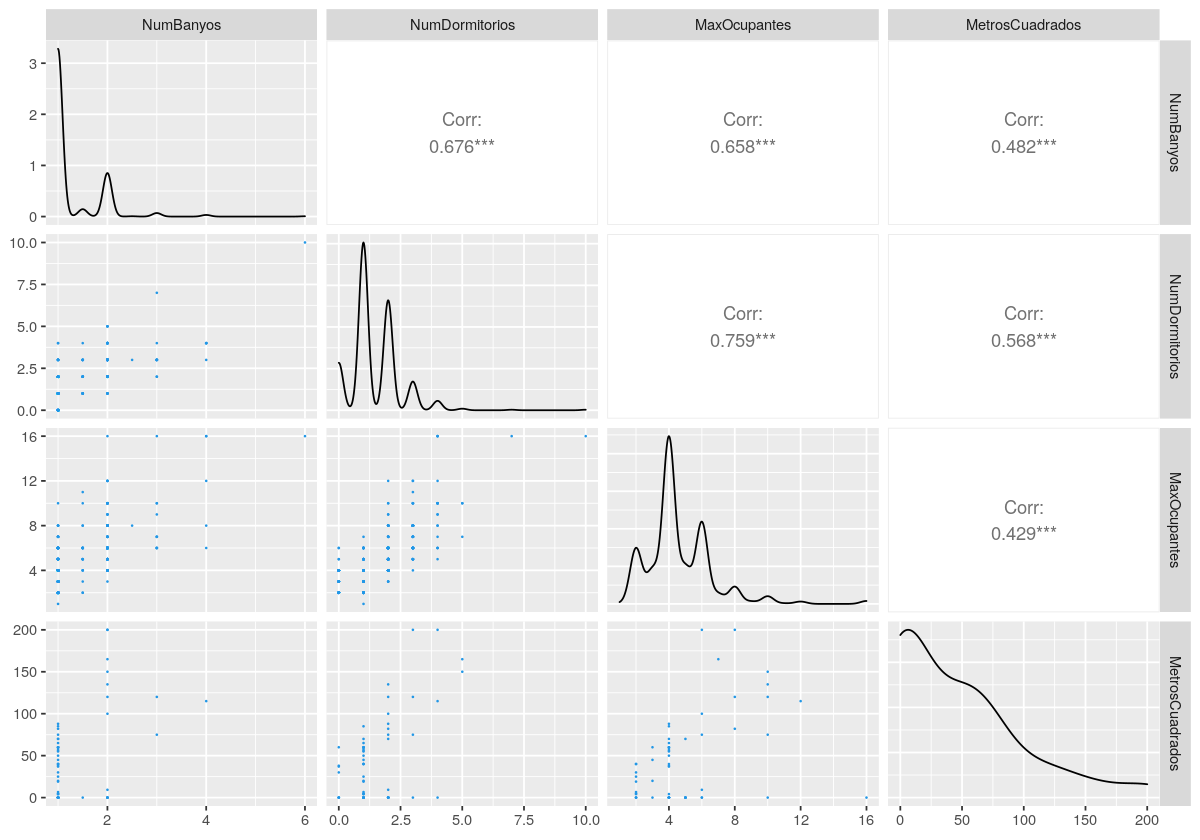

In [60]:
options(repr.plot.height=7,repr.plot.width=10)
ggpairs(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],
       lower = list(continuous = wrap("points",size=0.1,color=4)))

In [61]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


<span style="color:#051367">Se observa que la **correlación** entre el **número de dormitorios** y los **metros cuadrados** es sorprendentemente baja. ¿Son de fiar esos números?</span>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


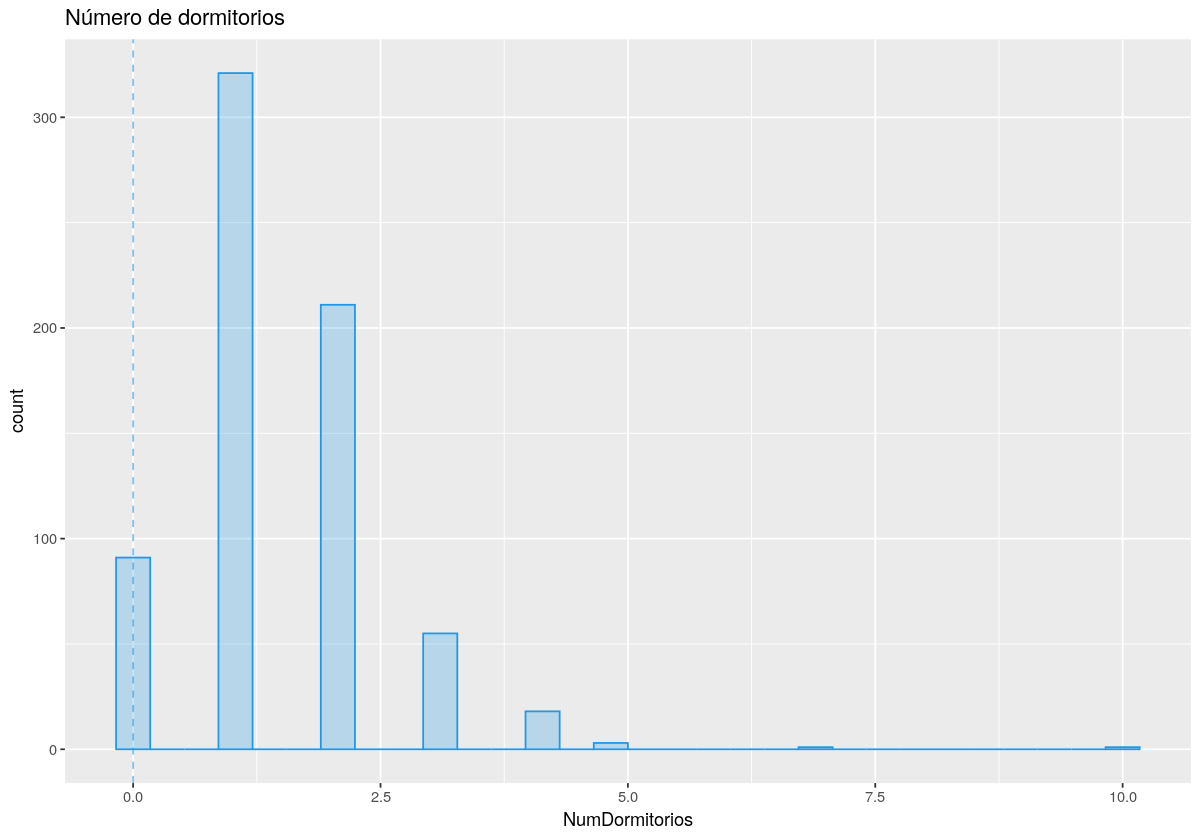

Warning message:
“Removed 641 rows containing missing values (geom_point).”


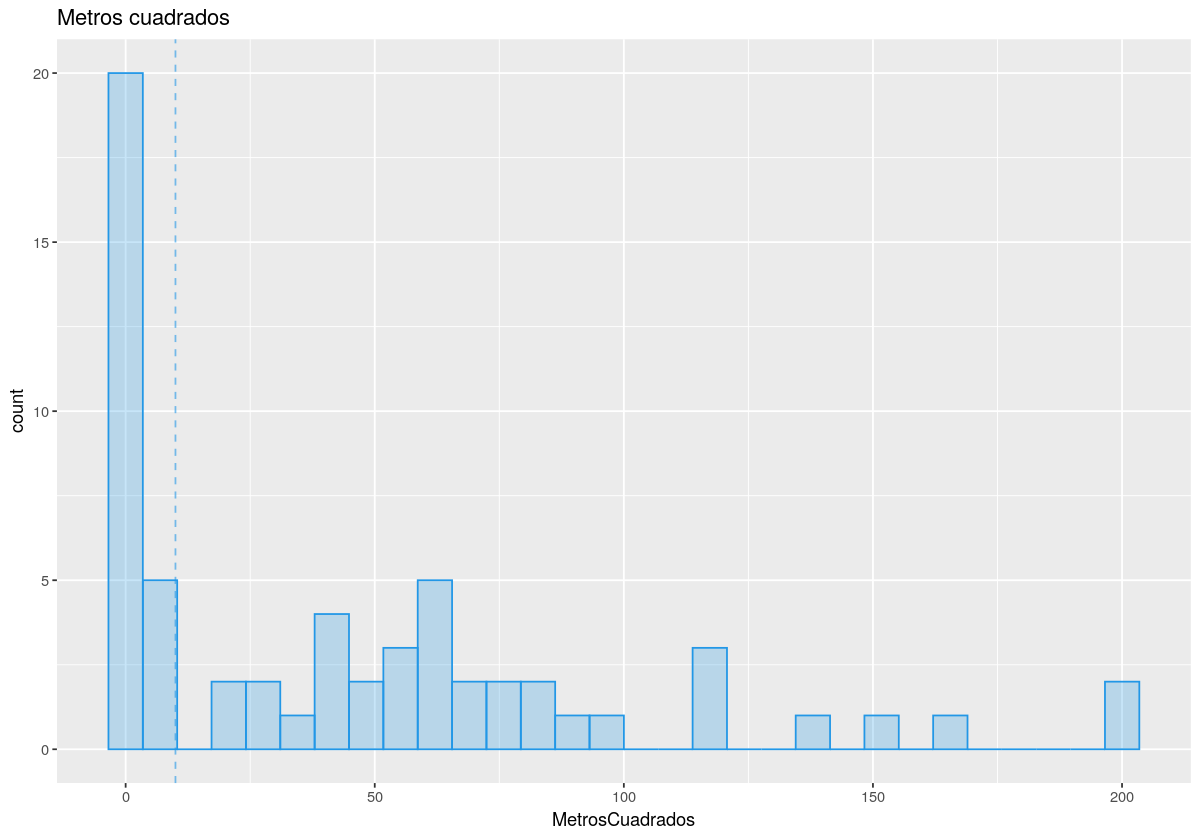

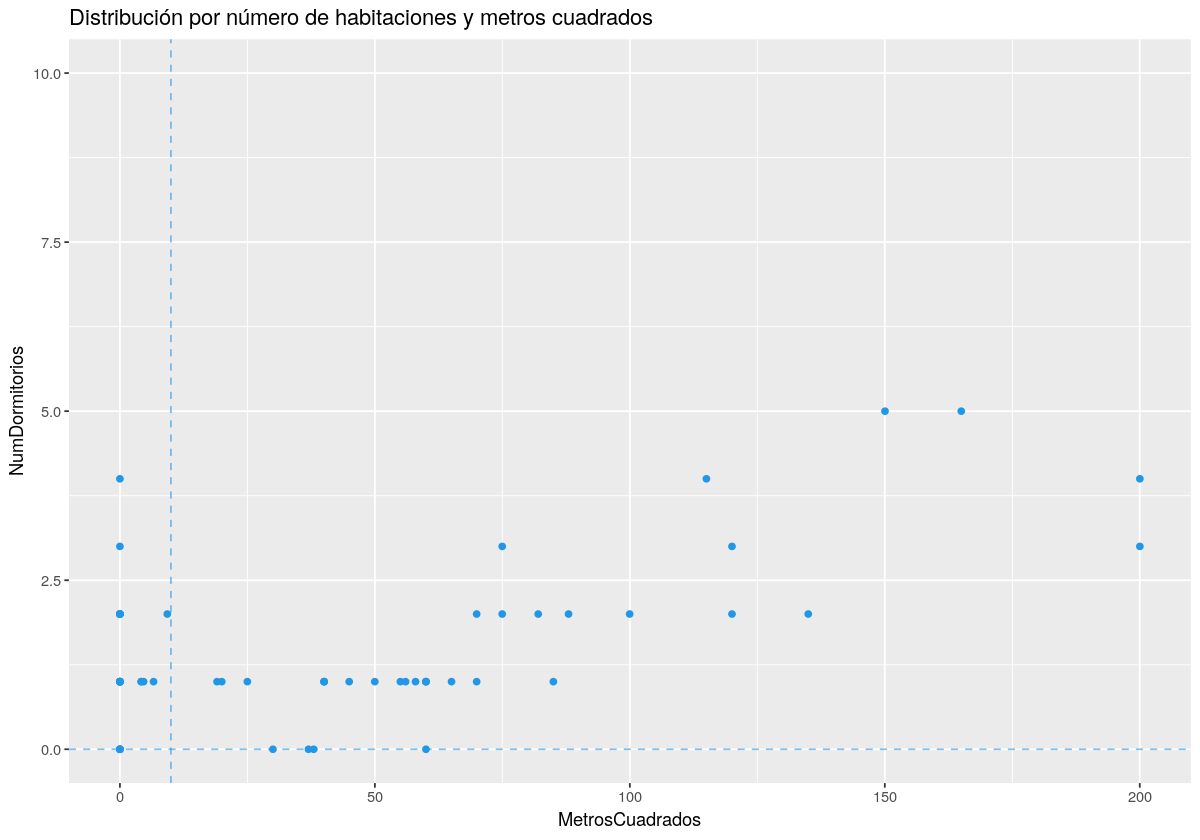

In [62]:
ggplot(barrio_sol, aes(x=NumDormitorios))+geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Número de dormitorios")+ 
    geom_vline(xintercept = 0,color=4, alpha=0.6, linetype = "dashed")

ggplot(barrio_sol, aes(x=MetrosCuadrados))+geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Metros cuadrados")+ 
    geom_vline(xintercept = 10,color=4, alpha=0.6, linetype = "dashed")

ggplot(barrio_sol, aes(x=MetrosCuadrados, y=NumDormitorios))+ 
    geom_point(color=4)+ 
    geom_vline(xintercept = 10,color=4, alpha=0.6, linetype = "dashed")+
    geom_hline(yintercept = 0,color=4, alpha=0.6, linetype = "dashed")+
    ggtitle("Distribución por número de habitaciones y metros cuadrados")

<span style="color:#5D8BF4"> Lo que podemos observar de los gráficos es que existen, en nuestras muestras, valores o datos incongruentes, como son el número de apartamentos con 0 dormitorios, o 0m2, o apartamentos con menos de 10m2 en cuyo caso es probable que se trate de un alquiler por habitaciones y no de un alquiler completo de vivienda.</span>

<span style="color:#5D8BF4"> Es muy probable que el valor de **las correlanciones obtenidas anteriormente puedan esatar sesgadas** por lo que debemos hacer un filtrado de nuestros datos y descartar los valores incogruentes.</span>

In [63]:
barrio_sol_filtered <- subset(barrio_sol, MetrosCuadrados != 0)
barrio_sol_filtered <- subset(barrio_sol_filtered, MetrosCuadrados > 10)
barrio_sol_filtered <- subset(barrio_sol_filtered, NumDormitorios != 0)
#barrio_sol_filtered

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



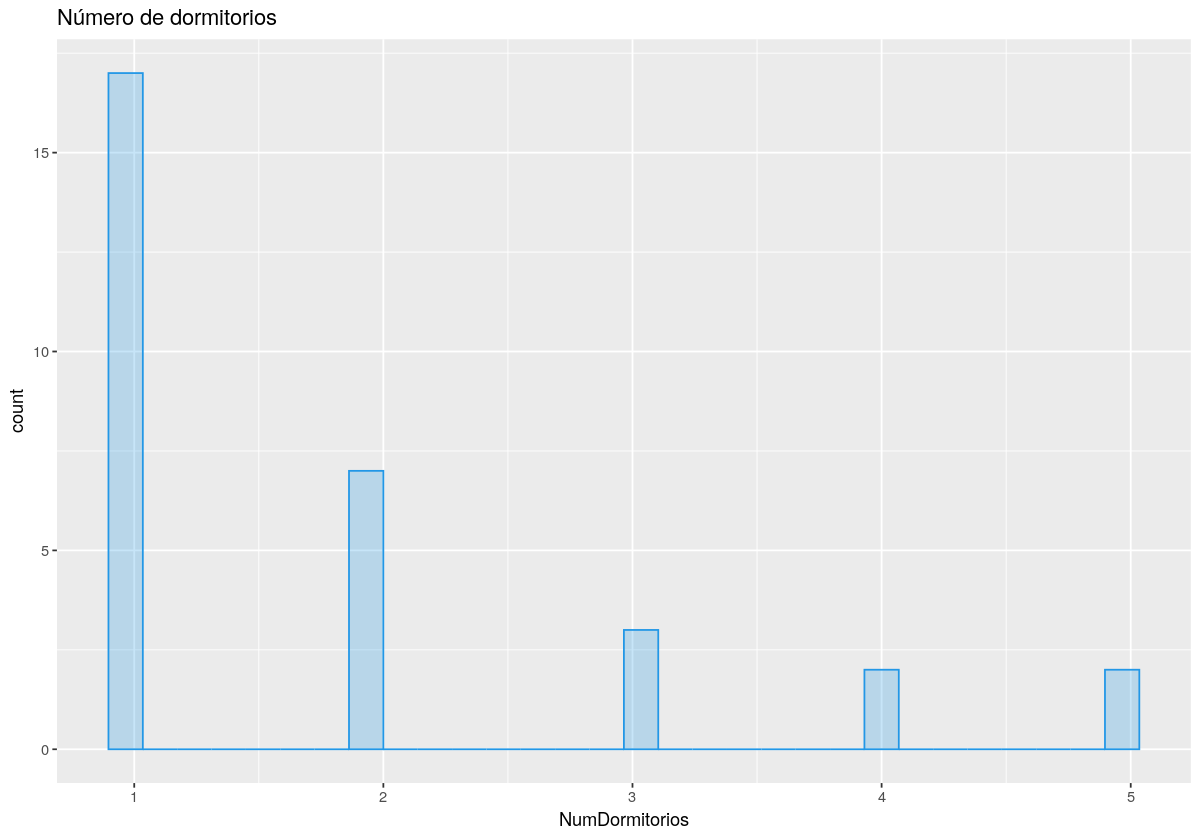

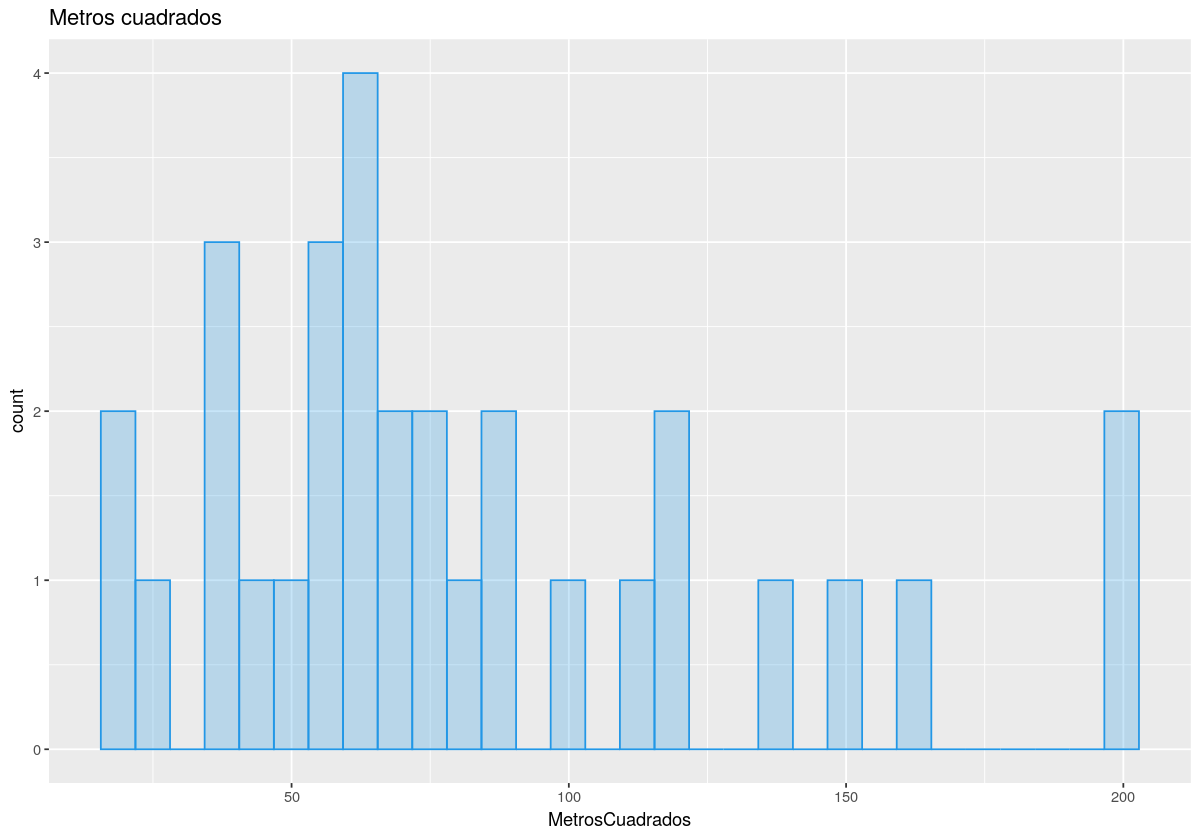

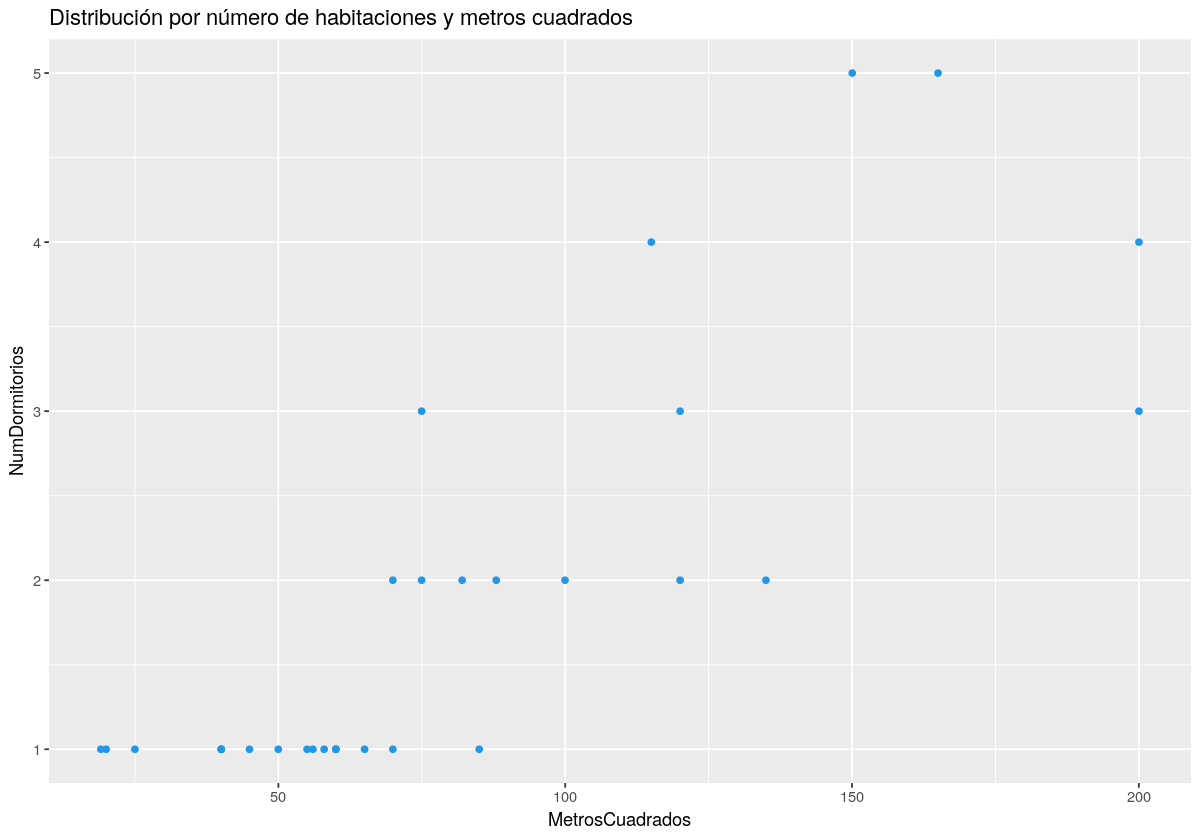

In [64]:
ggplot(barrio_sol_filtered, aes(x=NumDormitorios))+geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Número de dormitorios")

ggplot(barrio_sol_filtered, aes(x=MetrosCuadrados))+geom_histogram(col = 4, fill = 4, alpha=0.25)+
    ggtitle("Metros cuadrados")

ggplot(barrio_sol_filtered, aes(x=MetrosCuadrados, y=NumDormitorios))+ 
    geom_point(color=4)+
    ggtitle("Distribución por número de habitaciones y metros cuadrados")

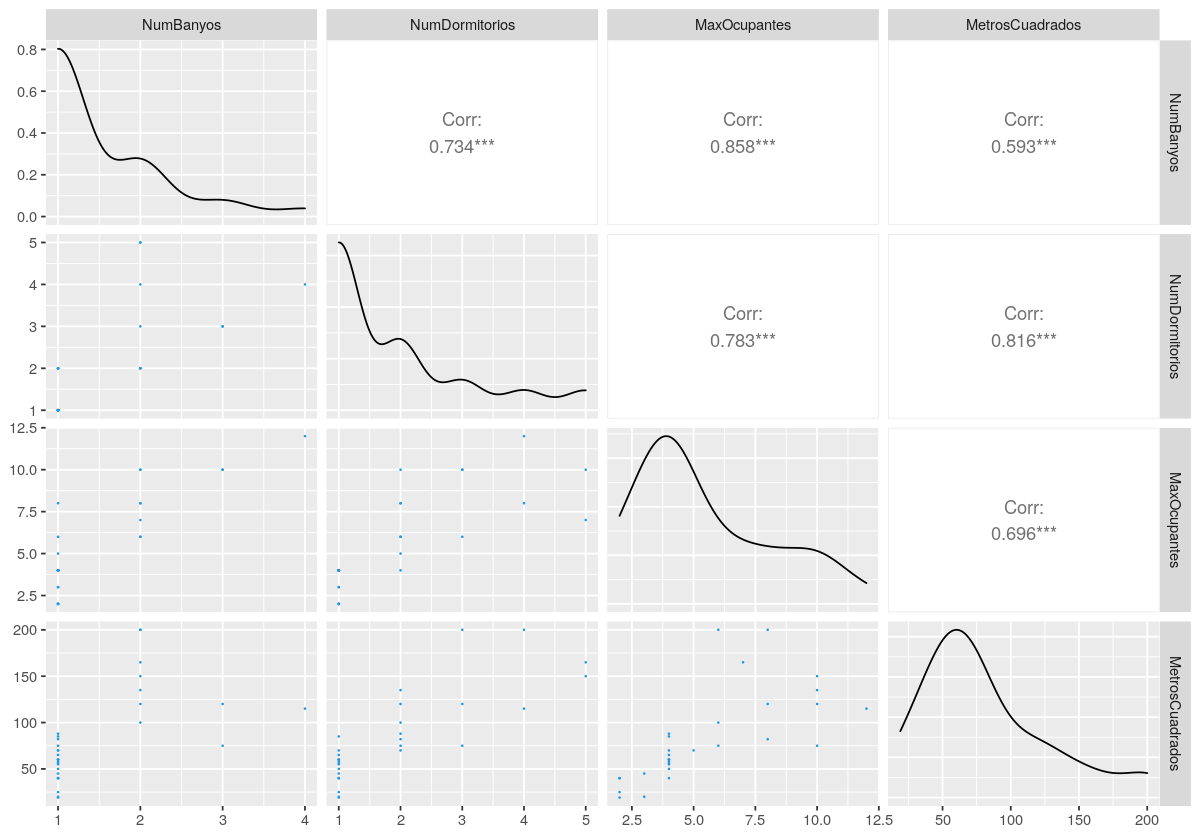

In [65]:
options(repr.plot.height=7,repr.plot.width=10)
ggpairs(barrio_sol_filtered[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],
       lower = list(continuous = wrap("points",size=0.1,color=4)))

In [66]:
cor(barrio_sol_filtered[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7337699,0.8579905,0.5928876
NumDormitorios,0.7337699,1.0000000,0.7827712,0.8163771
MaxOcupantes,0.8579905,0.7827712,1.0000000,0.6957651
MetrosCuadrados,0.5928876,0.8163771,0.6957651,1.0000000


<span style="color:#5D8BF4"> Lo que aobservamos al realizar el filtrado es **el incremento del valor de la correlación entre NumDormitorios y MetrosCuadrados**, tanto es así, que es una de las correlaciones más altas de entre las cuatro variables.</span>

<span style="color:#051367">Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.</span>

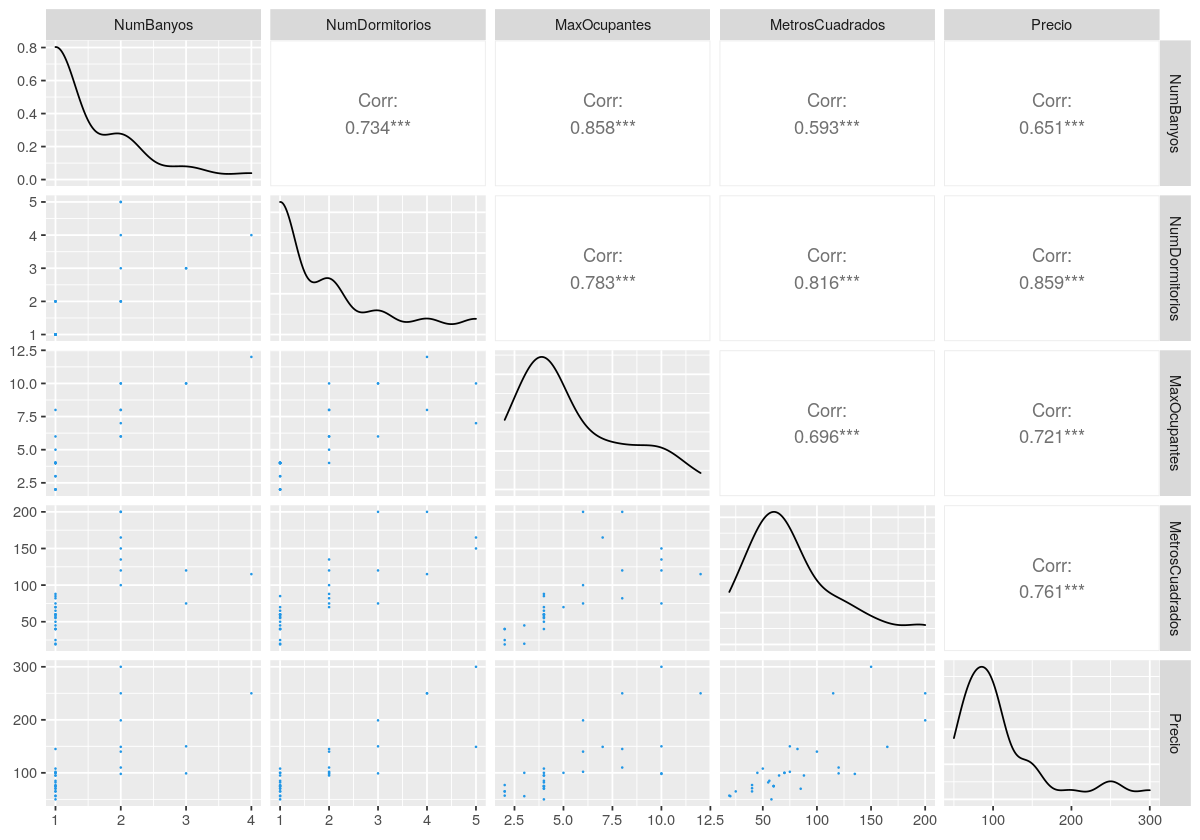

In [67]:
options(repr.plot.height=7,repr.plot.width=10)
ggpairs(barrio_sol_filtered[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados", "Precio")],
       lower = list(continuous = wrap("points",size=0.1,color=4)))

In [68]:
model <- lm(data = barrio_sol_filtered, Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.042 -13.252  -2.146  19.666  60.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      24.0964    13.8767   1.736  0.09432 . 
NumBanyos        -2.3020    15.6011  -0.148  0.88383   
NumDormitorios   32.5218    10.1108   3.217  0.00346 **
MaxOcupantes      2.7079     4.7448   0.571  0.57311   
MetrosCuadrados   0.1999     0.2200   0.909  0.37189   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.59 on 26 degrees of freedom
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7155 
F-statistic: 19.86 on 4 and 26 DF,  p-value: 1.346e-07


In [69]:
#confint(model)

<span style="color:#5D8BF4"> Lo que observamos es que la variable que más confianza ofrece a la hora de obtener el precio de un inmueble es el NumDormitorios. Mientras que NumBanyos y MaxOcupantes parecen no tener efecto estadístico significativo.</span>

In [70]:
model <- lm(data = barrio_sol_filtered, Precio ~ NumDormitorios+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.298 -13.081  -1.841  19.108  61.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27.8002    11.4561   2.427 0.021927 *  
NumDormitorios   35.3982     8.1306   4.354 0.000162 ***
MetrosCuadrados   0.2273     0.2082   1.092 0.284167    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.67 on 28 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7314 
F-statistic: 41.84 on 2 and 28 DF,  p-value: 3.879e-09


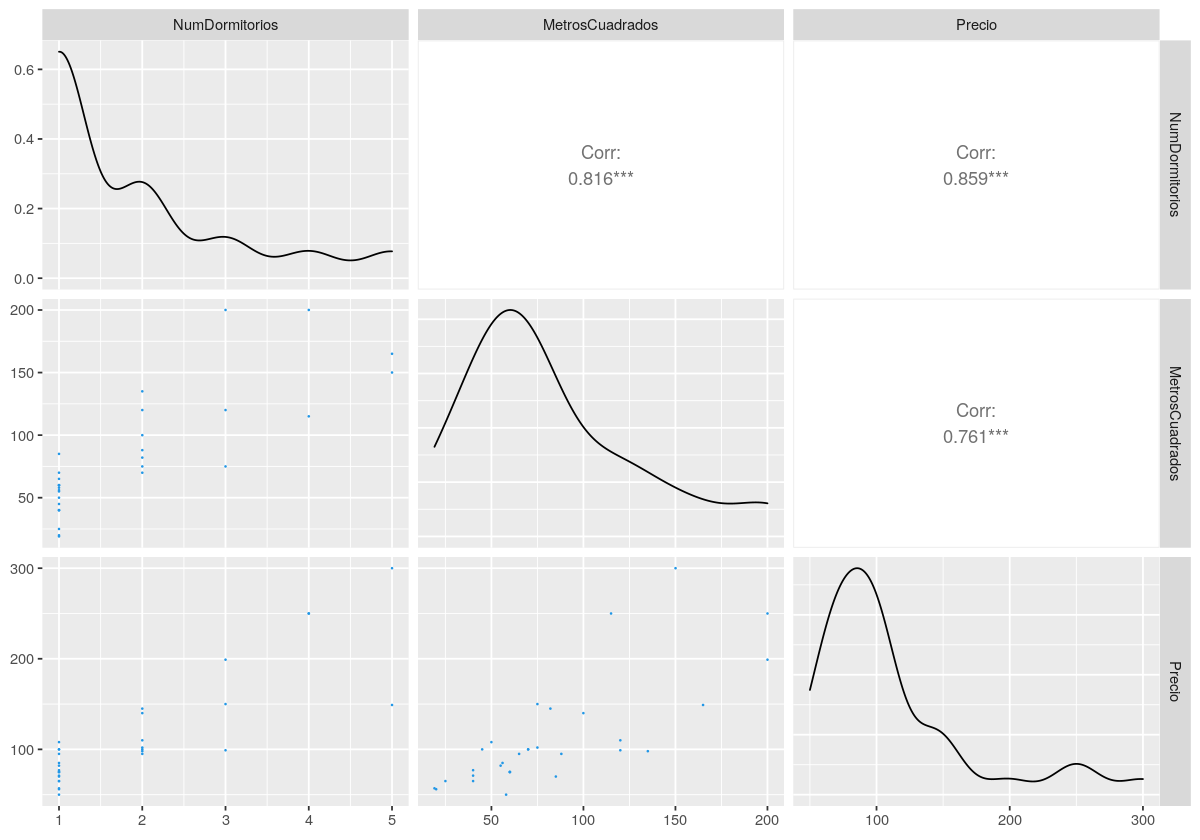

In [71]:
options(repr.plot.height=7,repr.plot.width=10)
ggpairs(barrio_sol_filtered[,c("NumDormitorios","MetrosCuadrados", "Precio")],
       lower = list(continuous = wrap("points",size=0.1,color=4)))

<span style="color:#051367">¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?</span>

<span style="color:#5D8BF4"> La **variable que más confianza ofrece** a la hora de obtener el precio de un inmueble es el **NumDormitorios**. Se observa además que por cada número de habitaión el precio puede verse incrementado 35.3982eur.</span>

<span style="color:#051367">Responde con su correspondiente margen de error (valores de confianza) del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?</span>

In [72]:
model <- lm(data = barrio_sol_filtered, Precio ~ MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.894 -19.902  -1.230   8.741 121.549 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.3289    14.4874   2.301   0.0288 *  
MetrosCuadrados   0.9672     0.1530   6.323  6.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.3 on 29 degrees of freedom
Multiple R-squared:  0.5796,	Adjusted R-squared:  0.5651 
F-statistic: 39.97 on 1 and 29 DF,  p-value: 6.601e-07


`geom_smooth()` using formula 'y ~ x'



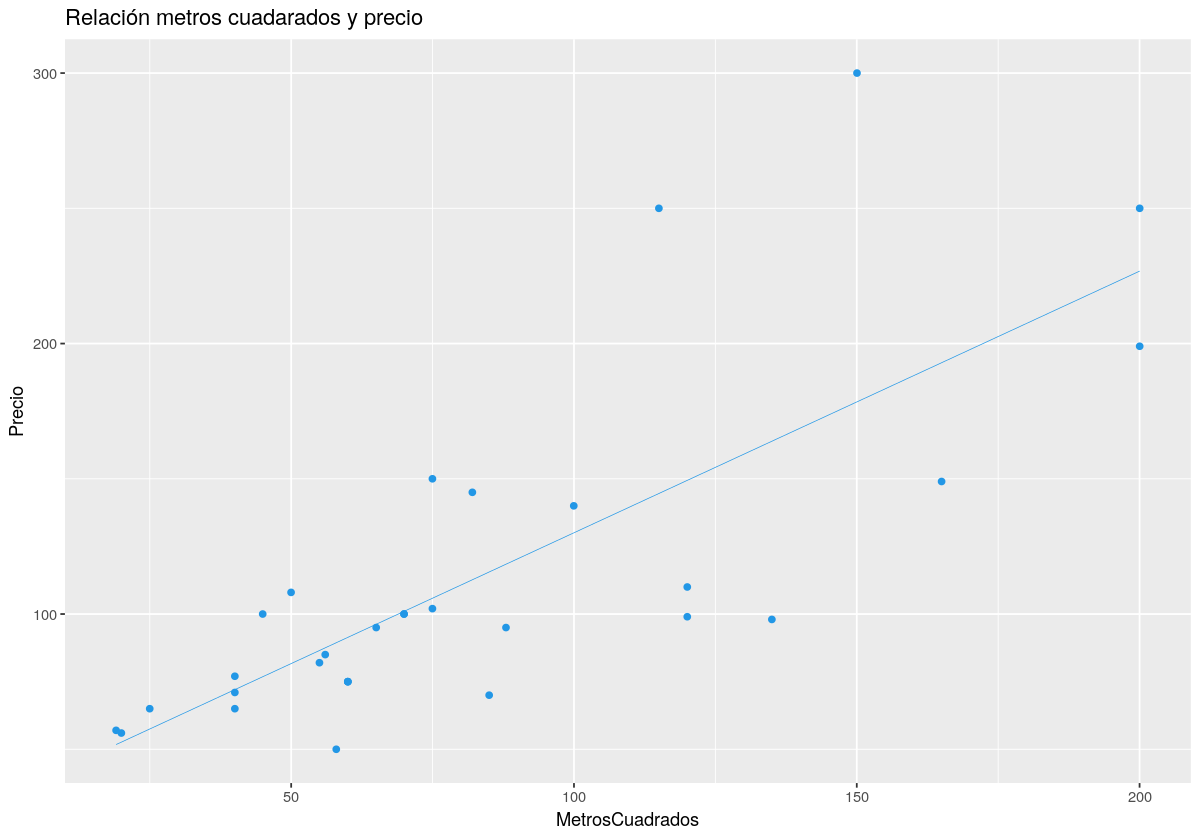

In [73]:
ggplot(data=barrio_sol_filtered, aes(x=MetrosCuadrados ,y=Precio))+
    geom_point(color=4)+
    geom_smooth(method = "lm", se = FALSE, color=4, alpha=0.6, size=0.2)+
    #geom_vline(xintercept = 125,color=4, alpha=0.6, linetype = "dashed")+
    ggtitle("Relación metros cuadarados y precio")

In [74]:
confint(model)

,2.5 %,97.5 %
(Intercept),3.6987773,62.958949
MetrosCuadrados,0.6543517,1.280121


<span style="color:#5D8BF4"> Podemos decir que por cada metro cuadrado el precio del alquiler puede verse incrementado 0.9672eur, y en el 95% de los casos ese incremento, según la matriz de confianza, estará en el rango de entre 0.65 y 1.28eur.</span>

<span style="color:#051367">Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?</span>

In [75]:
model <- lm(data = barrio_sol_filtered, Precio ~ NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.118 -17.180  -0.534  23.143  53.882 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.888     10.500   3.132  0.00394 ** 
NumDormitorios   42.646      4.711   9.052 6.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.77 on 29 degrees of freedom
Multiple R-squared:  0.7386,	Adjusted R-squared:  0.7296 
F-statistic: 81.94 on 1 and 29 DF,  p-value: 6.01e-10


In [76]:
model$coefficients

(Intercept) NumDormitorios 
      32.88794       42.64610

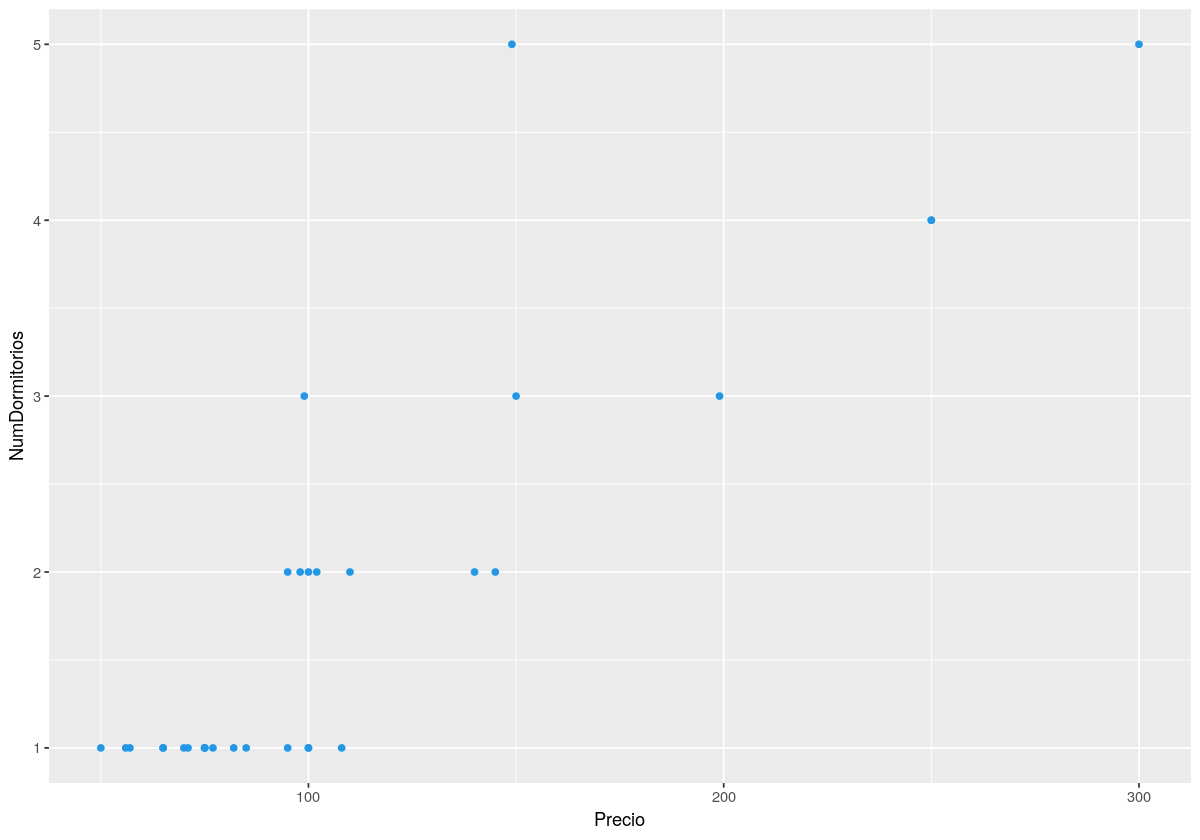

In [81]:
ggplot(barrio_sol_filtered, aes(x=Precio, y=NumDormitorios))+geom_point(color=4)

In [78]:
confint(model)

,2.5 %,97.5 %
(Intercept),11.41223,54.36366
NumDormitorios,33.01073,52.28146


<span style="color:#5D8BF4"> Podemos decir que por cada número de habitación el precio del alquiler puede verse incrementado 42.646eur, y en el 95% de los casos ese incremento, según la matriz de confianza, estará en el rango de entre 33.01 y 52.28eur.</span>

<span style="color:#051367">¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?</span>

<span style="color:#051367">¿Cual es el intervalo de confianza de esa probabilidad?</span>

In [79]:
exitos <-barrio_sol_filtered[which(barrio_sol_filtered$NumDormitorios == 3),]
ns <- length(exitos$Barrio)
n <- length(barrio_sol_filtered$Barrio)

In [80]:
binom.test(ns,n)


	Exact binomial test

data:  ns and n
number of successes = 3, number of trials = 31, p-value = 4.649e-06
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.02041986 0.25753906
sample estimates:
probability of success 
            0.09677419 


<span style="color:#5D8BF4"> La probabilidad de éxito de encontrar un piso de 3 dormitorios es de 0.09677419%, y el intervalo de confianza (del 95%) se encuentra entre 0.02 y 0.25, pudiendo concluir que la probabilidad de encontrar un piso con 3 dormitorios en Sol está dentro de dicho intervalo.</span>